# Time Series - Maker workshop

## Quick round table

Presentation & expectations?

## Definition

- **Time series data is data that is collected at different points in time.** This is opposed to cross-sectional data which observes individuals, companies, etc. at a single point in time.


- If you previously followed the *Maker workshop dedicated to Machine Learning*, you've already worked with cross-sectional data, but not time series.


- Time series can be found in a wide variety of domains: in economics, social sciences, medicine, but also ( and obviously) in physical sciences and engineering. As a result, **we deal with them a lot at Total!**

## Outline

1. Today's challenge
2. Today's Data Science environment checklist
3. Exploring the data 
    - Types, indexes and unique values
    - Distributions
    - Correlations
4. Dealing with missing values
5. Resampling techniques
6. Time series visualization
7. Anomalies detection techniques
8. Forecasting
8. Open discussion / work session

## Today's Challenge

**Predict the air temperature in 2017 based on weather data from 2009 to 2016.**

- Features available:
    - Air temperature
    - Atmospheric pressure
    - Humidity
    - Wind direction
    - Etc.

## Today's Data Science environment checklist

- A Jupyter notebook
- The data folder (the one that we sent)
- The following libraries installed:

In [2]:
%run ../setup/setup.ipynb

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
Using legacy 'setup.py install' for fbprophet, since package 'wheel' is not installed.
    Running setup.py install for fbprophet ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/yannhallouard/PycharmProjects/MAKER_DISPLAY_REPOSITORY/venv/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/5g/kfn3g3d530z_zlz71l5qywb40000gn/T/pip-install-wywrv9dp/fbprophet_2d49d74ae09248c5a2056158abd23507/setup.py'"'"'; __file__='"'"'/private/var/folders/5g/kfn3g3d530z_zlz71l5qywb40000gn/T/pip-install-wywrv9dp/fbprophet_2d49d74ae09248c5a2056158abd23507/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/5g/kfn3g3d530z_zlz71l5qywb40000gn/T/pip-record-783sb_8m/install-record.txt --single-version-externally-managed --compile --inst

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from fbprophet import Prophet

# Optional
%config InlineBackend.figure_format = 'retina'

Importing plotly failed. Interactive plots will not work.


In [3]:
# Uncomment this if you don't have the data
# !wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
# !unzip jena_climate_2009_2016.csv.zip

# Used for data preparation

#raw_data_bis = pd.read_csv('../data/jena_climate_2009_2016.csv')
#raw_data_bis['open_st'] = 1.0
#
#df = raw_data_bis[['VPmax (mbar)', 'VPact (mbar)']].copy()
#import random
#ix = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
#for row, col in random.sample(ix, int(round(.01*len(ix)))):
#    df.iat[row, col] = np.nan
#
#raw_data_bis[['VPmax (mbar)', 'VPact (mbar)']] = df.copy()
#
#raw_data_bis.to_csv('../data/jena_climate_2009_2016.csv', index=False)

## Exploring the data

### Reading the raw data

- `head -n 10` is a useful shell command to give a look at a file's header (the first 10 lines in this case)
- In a Jupyter notebook, we can use the symbol `!` to run shell commands

_What are the useful details that you can see thanks to this command?_

In [1]:
!head -n 10 ../data/jena_climate_2009_2016.csv

Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),open_st
01.01.2009 00:10:00,996.52,-8.02,265.4,-8.9,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3,1.0
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.8,0.72,1.5,136.1,1.0
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.2,1.88,3.02,1310.24,0.19,0.63,171.6,1.0
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.5,198.0,1.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.0,0.32,0.63,214.3,1.0
01.01.2009 01:00:00,996.5,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7,1.0
01.01.2009 01:10:00,996.5,-7.62,265.81,-8.3,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5,1.0
01.01.2009 01:20:00,996.5,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.5,118.6,1.0
01.01.

Now that we have a better idea of the file's format, we can implement our reading function:

In [4]:
raw_data = pd.read_csv('../data/jena_climate_2009_2016.csv', sep=',')
raw_data.head()

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  open_st  
0       1307.75      1.03           1.75     152.3      1.0  
1       1309.80      0.72           1.50     136.1      1.0  
2       1310.24      0.19           0.63     171.6      1.0  
3       1309.19      0.34           0.50     198.0      1.0  
4       1309.00      0.32           0.63     214.3      1.0

### Data types

- Checking for data types is useful to make sure that types were properly inferred when reading the raw CSV file
- If you've already explored the data, you can specify the undetected types in the `pandas.read_csv` function
- Tip: Casting to smaller float types can help you tremendly reduce the size of a dataset

_Comment on the following dtypes. Do you think the proper types were inferred?_

In [5]:
raw_data.dtypes

Date Time           object
p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
open_st            float64
dtype: object

### Indexing

- When dealing with time series, we'll see that it can be useful to make the most out of pandas' `DatetimeIndex`, i.e. to set a `Datetime` column as index of the dataframe.

_Let's verify if the Datetime type was correctly inferred from the CSV file._

In [6]:
type(raw_data['Date Time'][0])

str

### Checking duplicated rows

- Before to continue the data manipulation, we should check for potential duplicated rows in the data that we want to get rid of.

_What is the percentage of duplicated rows among the complete dataset?_

In [7]:
percentage = raw_data[raw_data.duplicated(subset=['Date Time'])].shape[0] / raw_data.shape[0] * 100
print(f'Among the complete data, {round(percentage * 100, 2)}% are duplicated rows.')

Among the complete data, 7.78% are duplicated rows.


In [8]:
raw_data.drop_duplicates(subset='Date Time', inplace=True)

### Unique values

- Checking for unique values will give you information on your variables' granularity:
    - A small number of unique values can indicate the presence of a category
    - A single unique value may indicate that a variable is never changing, even out of your sample
   
_Do you notice any of these two cases in your dataset?_

In [9]:
for col in raw_data.columns: 
    print(col, ' '*(20-len(col))+'----->', len(raw_data[col].unique()))

Date Time            -----> 420124
p (mbar)             -----> 6117
T (degC)             -----> 5530
Tpot (K)             -----> 5639
Tdew (degC)          -----> 4343
rh (%)               -----> 4805
VPmax (mbar)         -----> 3657
VPact (mbar)         -----> 2438
VPdef (mbar)         -----> 3649
sh (g/kg)            -----> 1600
H2OC (mmol/mol)      -----> 2483
rho (g/m**3)         -----> 22972
wv (m/s)             -----> 1191
max. wv (m/s)        -----> 1502
wd (deg)             -----> 9893
open_st              -----> 1


### Distributions

- With the `seaborn` library, we can easily plot the distributions and the relationship between each pair of sensors

_Let's give a look at the following graph: from your functional knowledge of the sensors, can you identify normal or abnormal patterns?_

In [10]:
SELECTED_COLUMNS = ['p (mbar)', 'T (degC)', 'H2OC (mmol/mol)', 'sh (g/kg)', 'wd (deg)']

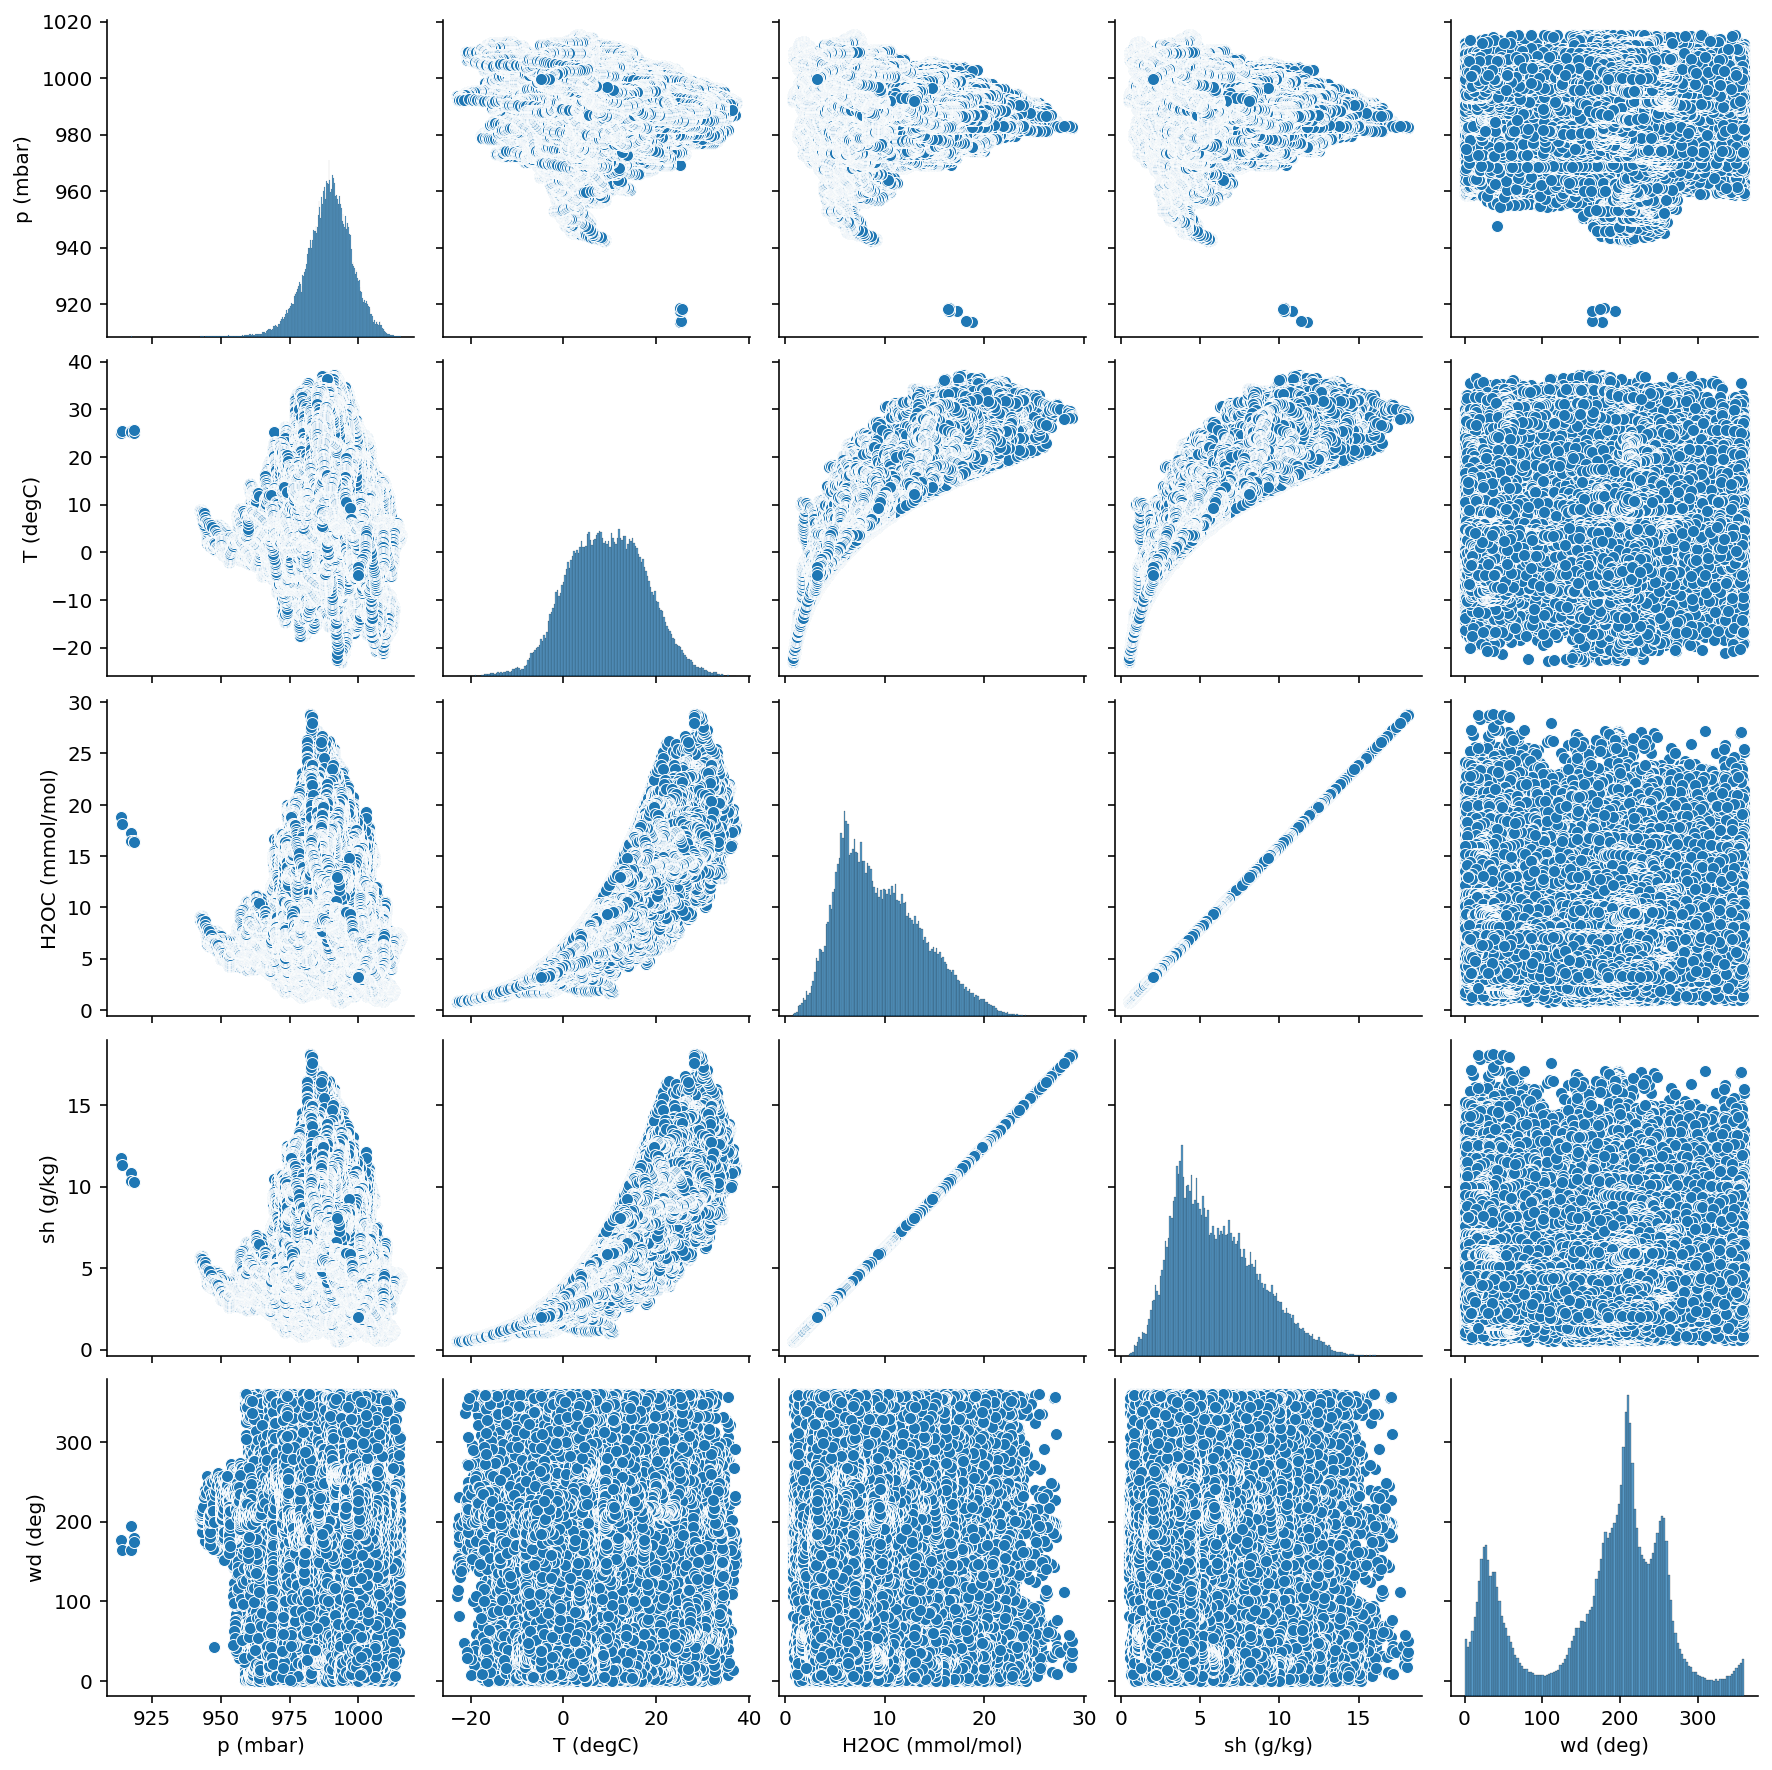

In [11]:
sns.pairplot(raw_data[SELECTED_COLUMNS])

plt.show()

### Correlations

- Correlation analysis is a statistical method used to **evaluate the strength of relationship between two quantitative variables**. 


- A high correlation means that two or more variables have a strong relationship with each other.
- A weak correlation means that the variables are hardly related.

_Let's continue our analysis by plotting the correlation matrix. Do you notice anything?_

In [13]:
def print_correlation(df):
    corr = df.corr()
    
    plt.figure(figsize=(8, 8))
    
    ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
                     cmap=sns.diverging_palette(20, 220, n=200),
                     square=True, annot=True)
    
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right')
    
    plt.show()

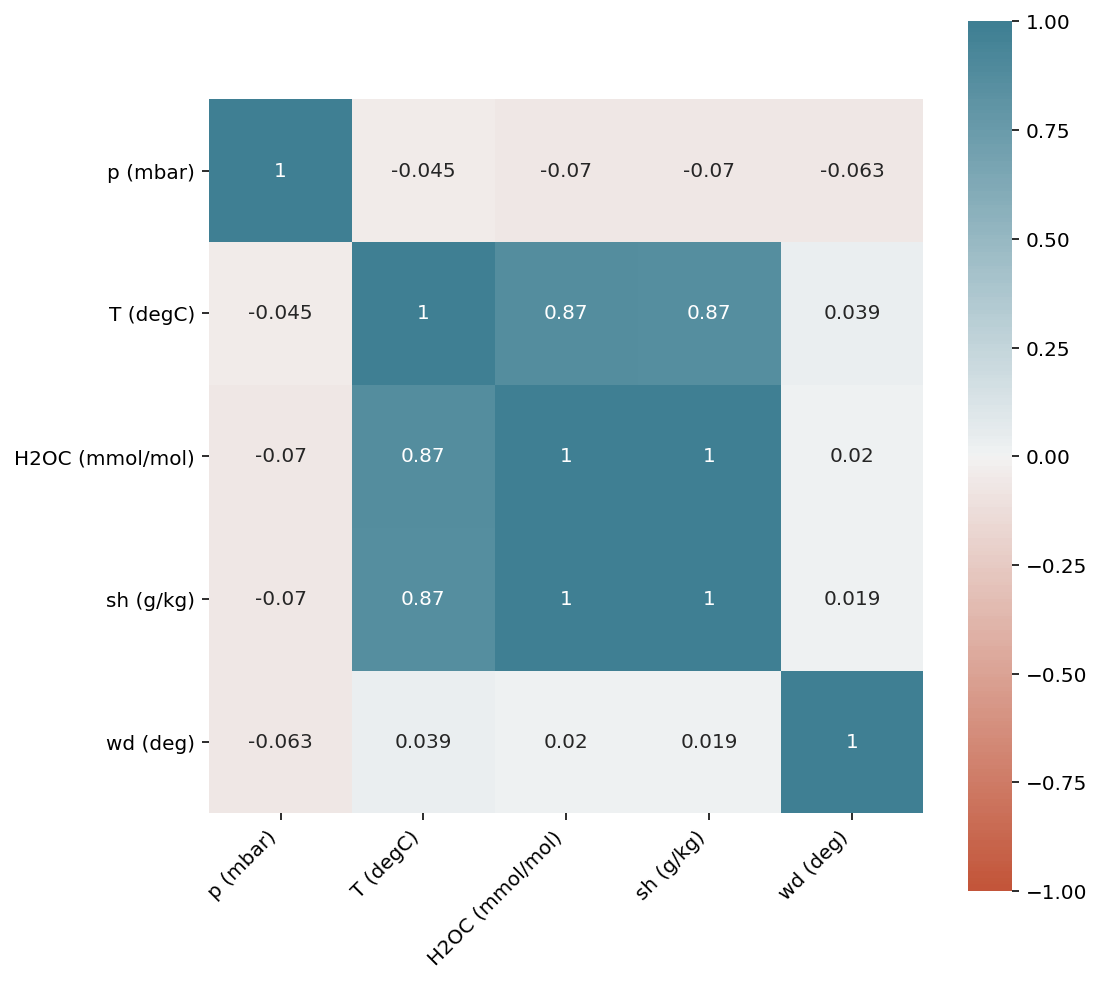

In [14]:
print_correlation(raw_data[SELECTED_COLUMNS])

Here, we use our own custom function to get a stylized correlation matrix. However, you could simply use the pandas method _your_dataframe_name.corr()_.

## Dealing with missing values

### Identification of missing values

_Let's identify missing values in our dataset._

Tip: Knowing that our variables are floats, the missing values will appear as `NaN` (= Not A Number).

In [15]:
raw_data.isna().sum()

Date Time             0
p (mbar)              0
T (degC)              0
Tpot (K)              0
Tdew (degC)           0
rh (%)                0
VPmax (mbar)       4220
VPact (mbar)       4177
VPdef (mbar)          0
sh (g/kg)             0
H2OC (mmol/mol)       0
rho (g/m**3)          0
wv (m/s)              0
max. wv (m/s)         0
wd (deg)              0
open_st               0
dtype: int64

In [16]:
raw_data[raw_data.isna().any(axis=1)]

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
12      01.01.2009 02:10:00    996.63     -8.85    264.57        -9.70   
46      01.01.2009 07:50:00    999.04     -8.13    265.10        -9.03   
124     01.01.2009 20:50:00   1000.30     -4.90    268.24        -6.19   
176     02.01.2009 05:30:00    998.13     -4.63    268.68        -5.14   
329     03.01.2009 07:00:00   1001.17     -8.48    264.59        -9.91   
...                     ...       ...       ...       ...          ...   
420153  29.12.2016 22:30:00   1012.23     -1.05    271.16        -1.37   
420167  30.12.2016 00:50:00   1012.41     -2.07    270.14        -2.31   
420218  30.12.2016 09:20:00   1011.74     -5.02    267.24        -5.59   
420337  31.12.2016 05:10:00   1006.71     -4.90    267.74        -8.64   
420420  31.12.2016 19:00:00   1002.26     -1.03    271.96        -5.64   

        rh (%)  VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
12        93.5          3.12           NaN          0.20       1.82   
46        93.2           NaN          3.08          0.22       1.92   
124       90.6          4.24           NaN          0.40       2.39   
176       96.2           NaN          4.16          0.16       2.60   
329       89.3          3.21           NaN          0.34       1.79   
...        ...           ...           ...           ...        ...   
420153    97.7          5.66           NaN          0.13       3.40   
420167    98.2           NaN          5.15          0.09       3.17   
420218    95.8          4.20           NaN          0.18       2.48   
420337    74.9           NaN          3.17          1.06       1.96   
420420    70.7          5.67           NaN          1.66       2.49   

        H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  \
12                 2.93       1312.11      0.16           0.50    158.30   
46                 3.08       1311.63      0.61           1.13    254.20   
124                3.84       1297.08      0.28           0.75    146.60   
176                4.17       1292.80      0.44           1.00     30.37   
329                2.87       1316.27      1.32           2.25    229.70   
...                 ...           ...       ...            ...       ...   
420153             5.46       1293.21      1.90           2.56    216.30   
420167             5.09       1298.46      0.84           1.48    208.40   
420218             3.98       1312.47      1.75           2.73    200.90   
420337             3.15       1305.77      0.51           1.04    208.90   
420420             4.00       1281.06      0.82           1.26    227.10   

        open_st  
12          1.0  
46          1.0  
124         1.0  
176         1.0  
329         1.0  
...         ...  
420153      1.0  
420167      1.0  
420218      1.0  
420337      1.0  
420420      1.0  

[8350 rows x 16 columns]

## Resampling techniques

### Assess the time series delta

In [17]:
sorted_data = raw_data.copy()
sorted_data['Date Time'] = pd.to_datetime(sorted_data['Date Time'], format='%d.%m.%Y %H:%M:%S')
sorted_data =  sorted_data.sort_values('Date Time')

dt_index_delta = sorted_data['Date Time'].diff()
dt_index_delta.value_counts()

0 days 00:10:00    420117
0 days 00:20:00         2
0 days 16:50:00         1
3 days 02:20:00         1
0 days 16:00:00         1
0 days 00:30:00         1
Name: Date Time, dtype: int64

Lucky for us, we have is a nice `resample()` method for pandas dataframes that have a DatetimeIndex.

### Create a DatetimeIndex

In [18]:
reindexed_data = sorted_data.copy()
reindexed_data.set_index('Date Time', inplace=True)

In order to better illustrate the concept of resampling, let's create a fake sinusoidal time series.

In [19]:
def create_fake_ts(length=10000):
    raw_values = np.sin(np.linspace(1, length, length)*2*np.pi/(24*60))
    date = pd.date_range(start='2017-01-01', periods=len(raw_values), freq='min')
    
    sampled = [i for i in range(len(raw_values)//2, len(raw_values), 8*60)]
    sampled_date = date[sampled]

    raw_less_values = raw_values[sampled]

    raw_df = pd.DataFrame(raw_values[:sampled[0]])
    raw_df.index = date[:sampled[0]]

    raw_less_values_df = pd.DataFrame(raw_less_values)
    raw_less_values_df.index = sampled_date

    raw_df = raw_df.append(raw_less_values_df)
    
    raw_df.index.name = 'date'
    raw_df.columns = ['values']

    return raw_df

In [20]:
ts_to_resample = create_fake_ts(length=10000)

We can then apply the same analysis of the time differences as in the previous section.

In [21]:
ts_to_resample.reset_index(inplace=True)

ts_to_resample['delta'] = ts_to_resample['date'].diff()

ts_to_resample.set_index('date', inplace=True)

ts_to_resample.head()

values           delta
date                                         
2017-01-01 00:00:00  0.004363             NaT
2017-01-01 00:01:00  0.008727 0 days 00:01:00
2017-01-01 00:02:00  0.013090 0 days 00:01:00
2017-01-01 00:03:00  0.017452 0 days 00:01:00
2017-01-01 00:04:00  0.021815 0 days 00:01:00

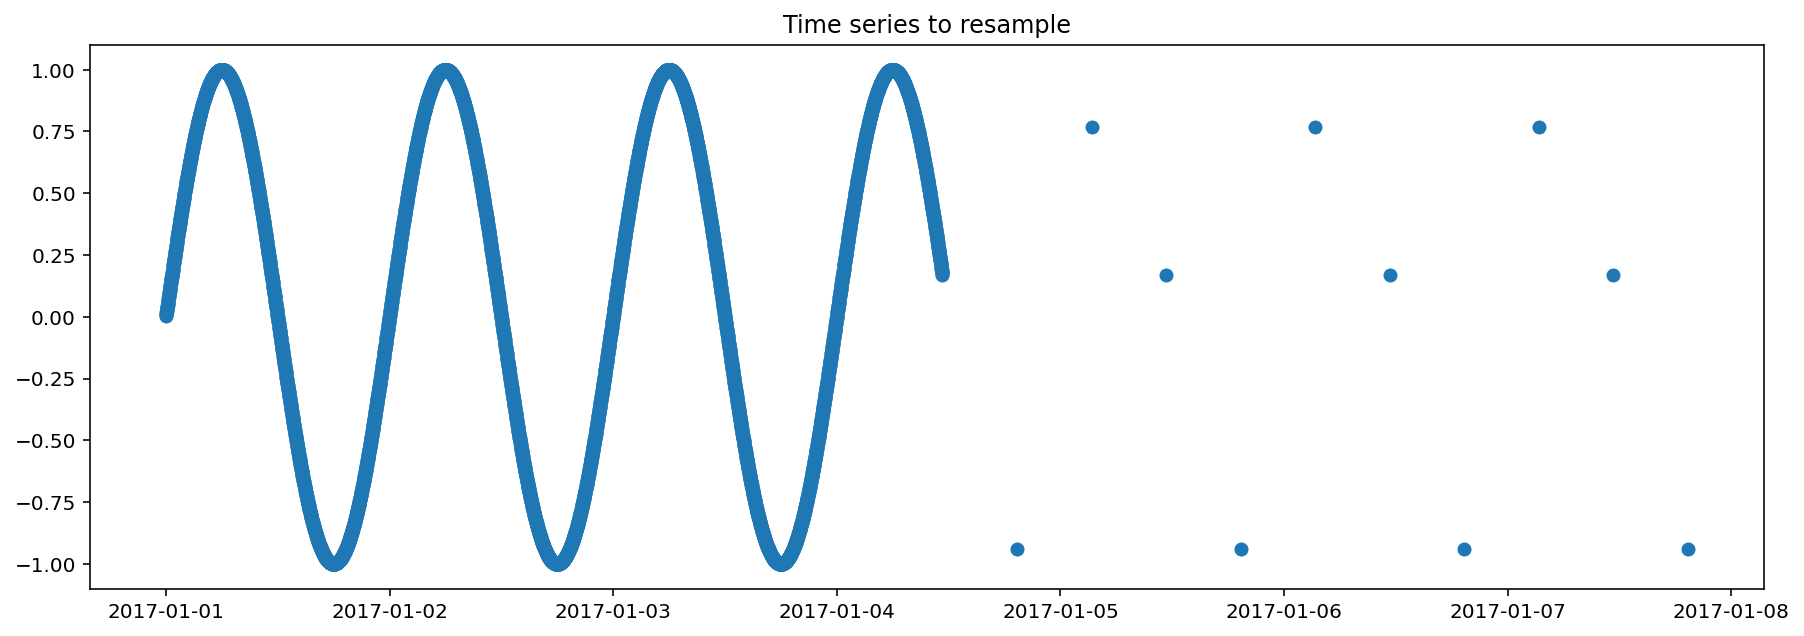

In [22]:
plt.figure(figsize=(15, 5))

plt.scatter(x=ts_to_resample.index, y=ts_to_resample['values'])

plt.title('Time series to resample')

plt.show()

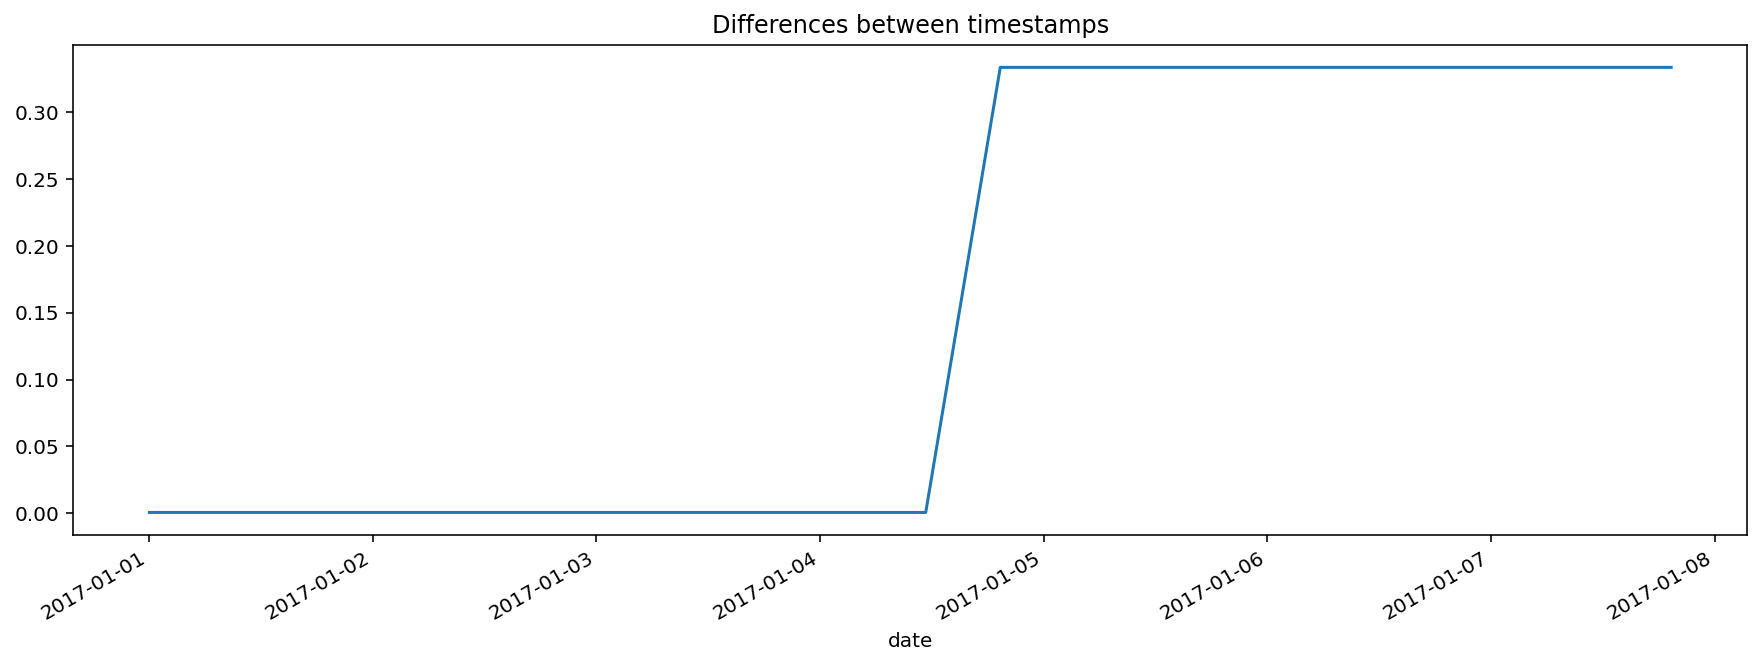

In [23]:
plt.figure(figsize=(15, 5))

(ts_to_resample['delta'].dt.total_seconds() / (3600 * 24)).plot()

plt.title('Differences between timestamps')

plt.show()

In this example data, starting on 2017-01-04, we no longer receive 1 data point every minute but instead 1 data point every 8h.

In our case, we have 2 different ways to go to obtain a time series with equally-spaced data points:
1. Remove some data points from the first part of the time series in order to get 8h-spaced data points similar to the second part of the time series: this technique is known as **undersampling**.
2. Add some data points in the second part of the time series in order to get 1min-spaced data points similar to the first part of the time series: this technique is known as **oversampling**.

### Oversampling

#### Forward-fill method

Even though it depends on the problem at hand, a way to go can be to use the frequency the most represented in order not to add/remove too many data points.

When oversampling your time series, i.e. creating new data points, you'll need to make a decision regarding which values to assign to these new points.

When resampling time series, a common risk is to introduce **data leakage** by adding data from the future to the past, i.e. data that would not have been available at the time.

For example, if you decide to fill a missing data point at time t with the next available values (this is known as **backward filling**), how would you have been able to do that at time t, knowing that these future values were not available at the time?

You should always ask yourself this question when manipulating time series, especially when adding data points and creating new features.

![](../setup/images/ffill.png)

As presented on this diagram, you should always use **forward filling** as a resampling method when oversampling. Backward filling would bring in unavailable values from the future and introduce a data leak.

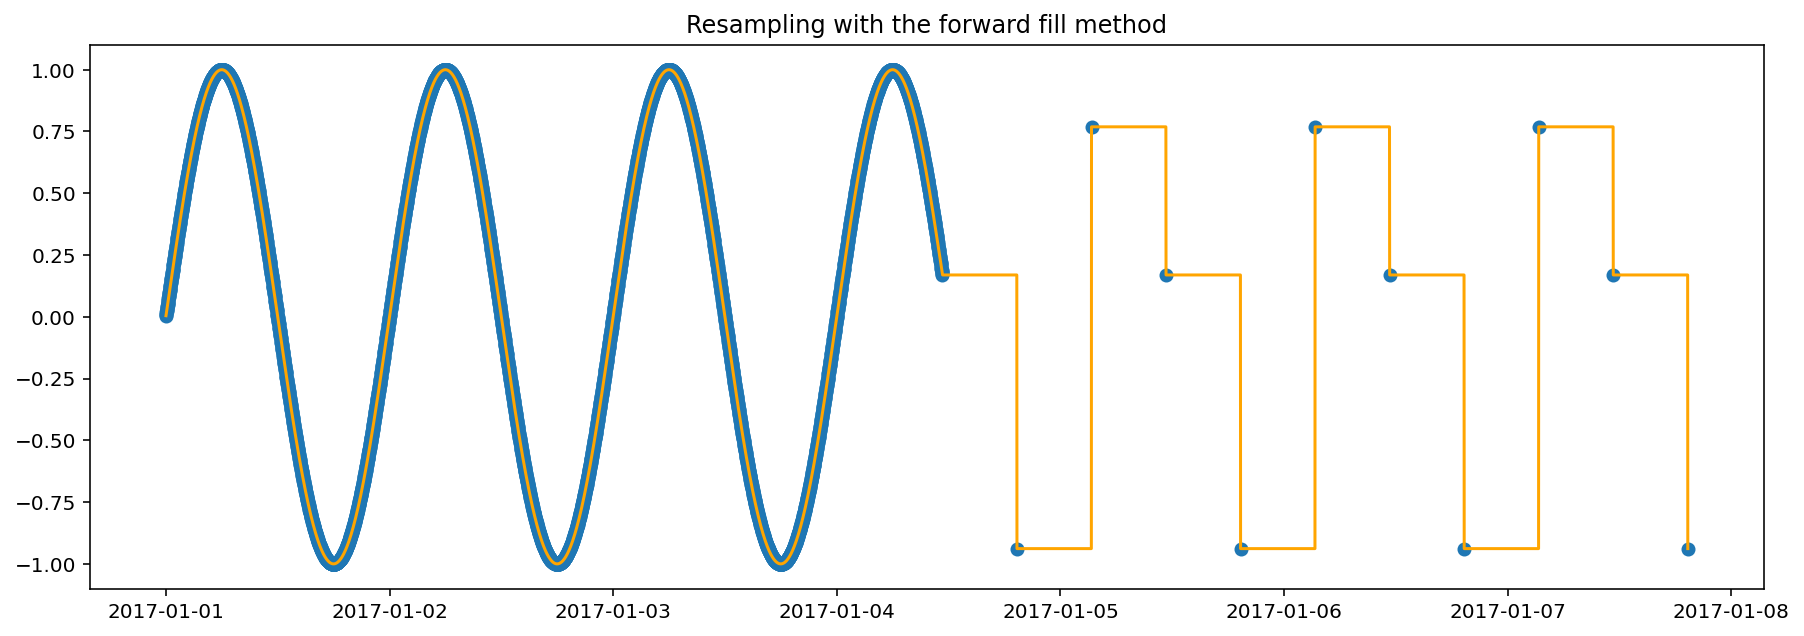

In [24]:
ts_to_resample_min = ts_to_resample['values'].resample('T').ffill()

plt.figure(figsize=(15, 5))

plt.plot(ts_to_resample_min, color='orange')
plt.scatter(x=ts_to_resample.index, y=ts_to_resample['values'])

plt.title('Resampling with the forward fill method')

plt.show()

#### Other methods - Linear

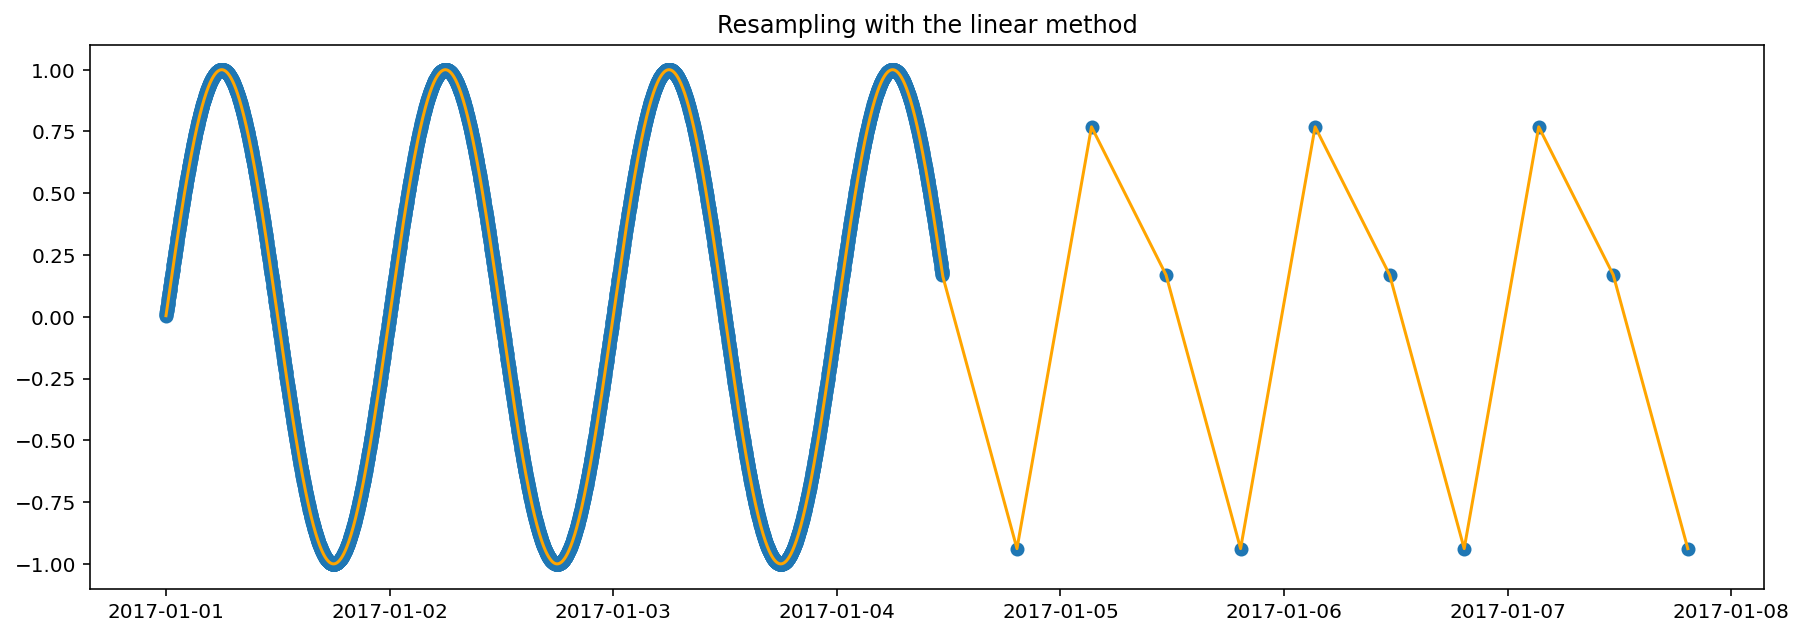

In [25]:
ts_to_resample_min = ts_to_resample['values'].resample('T').interpolate(method='linear')

plt.figure(figsize=(15, 5))

plt.plot(ts_to_resample_min, color='orange')
plt.scatter(x=ts_to_resample.index, y=ts_to_resample['values'])

plt.title('Resampling with the linear method')

plt.show()

#### Other methods - Nearest

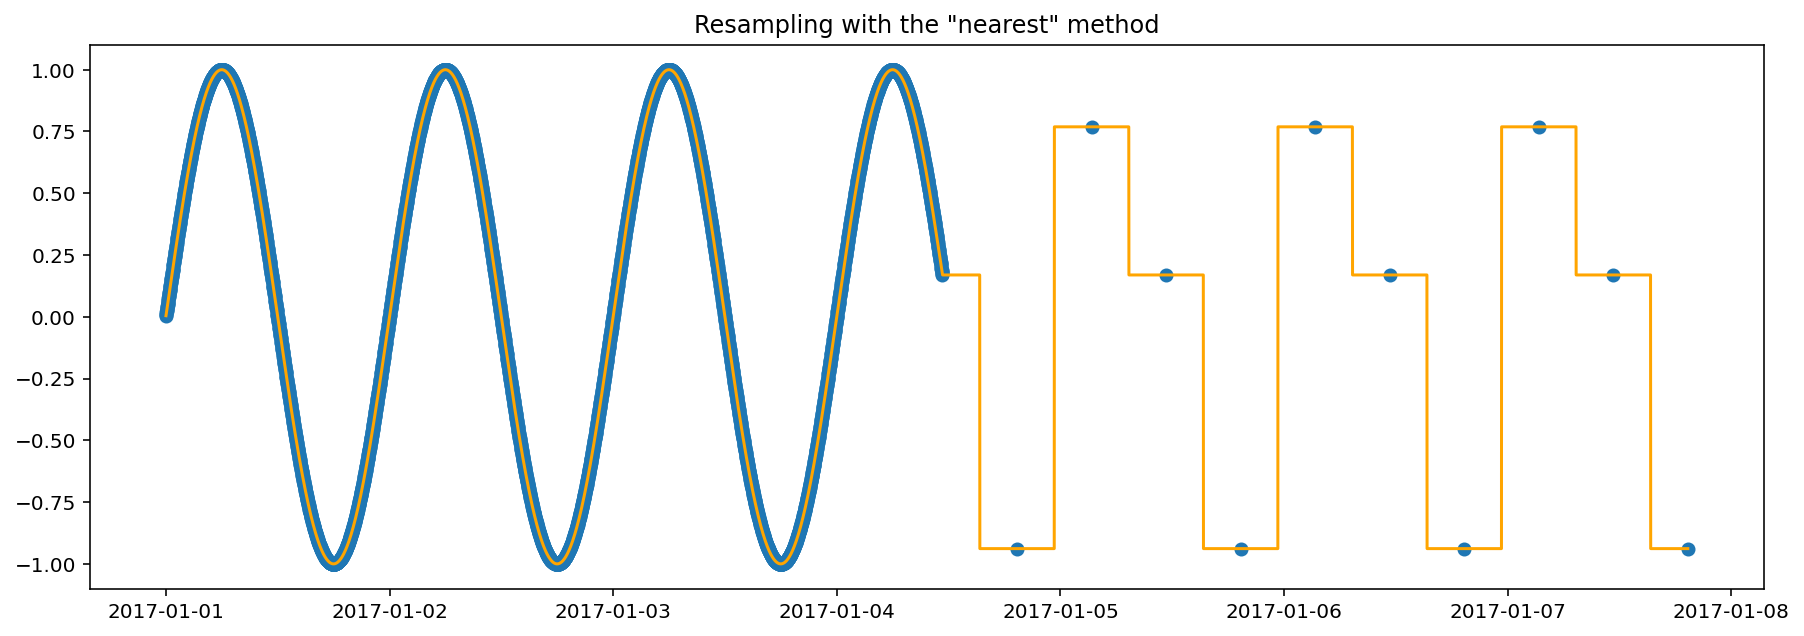

In [26]:
ts_to_resample_min = ts_to_resample['values'].resample('T').interpolate(method='nearest')

plt.figure(figsize=(15, 5))

plt.plot(ts_to_resample_min, color='orange')
plt.scatter(x=ts_to_resample.index, y=ts_to_resample['values'])

plt.title('Resampling with the "nearest" method')

plt.show()

As explained earlier, if you look closely at the different graphs, you'll realize that **the forward fill method is the only method presented which doesn't introduce any data leak.**

### Mix of undersampling and oversampling

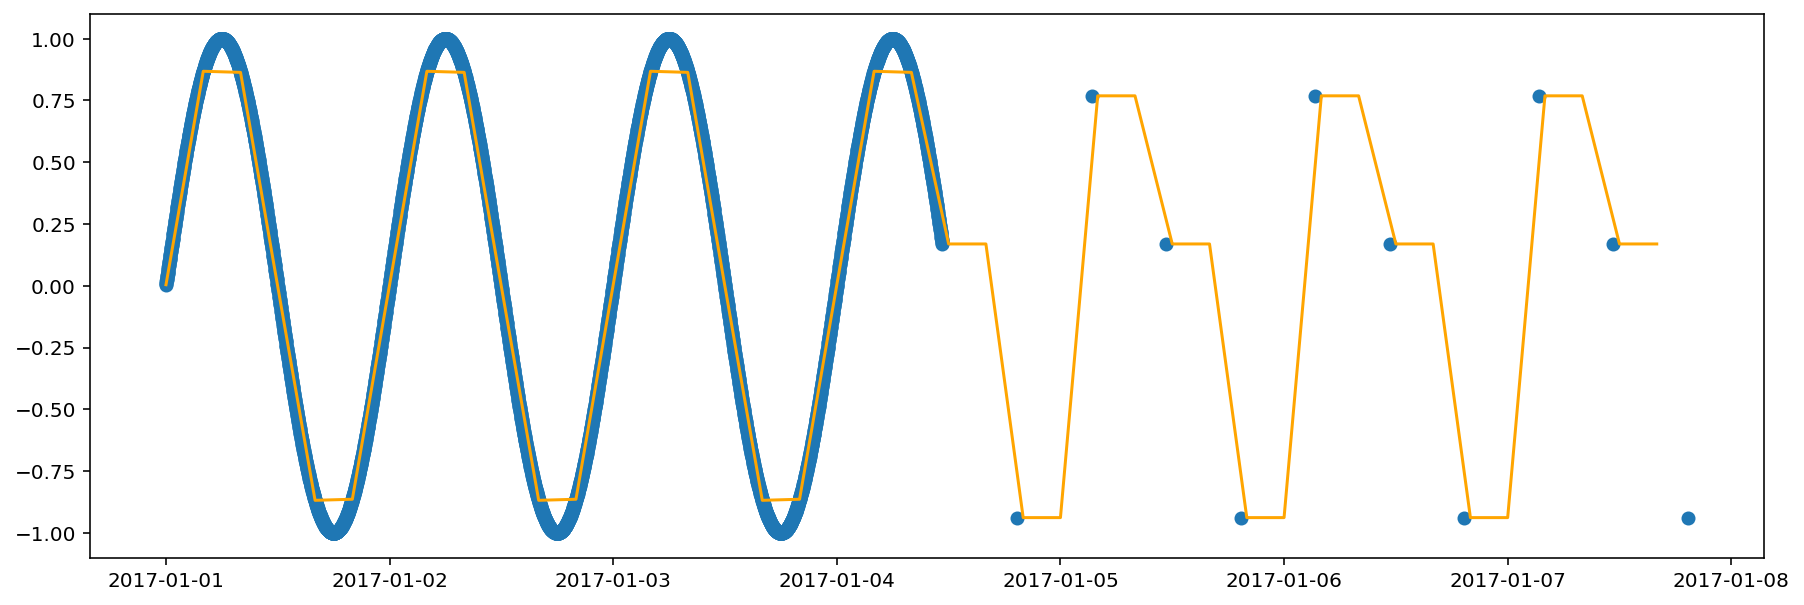

In [27]:
ts_to_resample_min = ts_to_resample['values'].resample('4H').ffill()

plt.figure(figsize=(15, 5))

plt.plot(ts_to_resample_min, color='orange')
plt.scatter(x=ts_to_resample.index, y=ts_to_resample['values'])

plt.show()

Now, we know everything we need to resample our data on a 10-min basis.

In [28]:
clean_data = reindexed_data.resample('10min').ffill()

## Time series visualization

### Global view & analysis

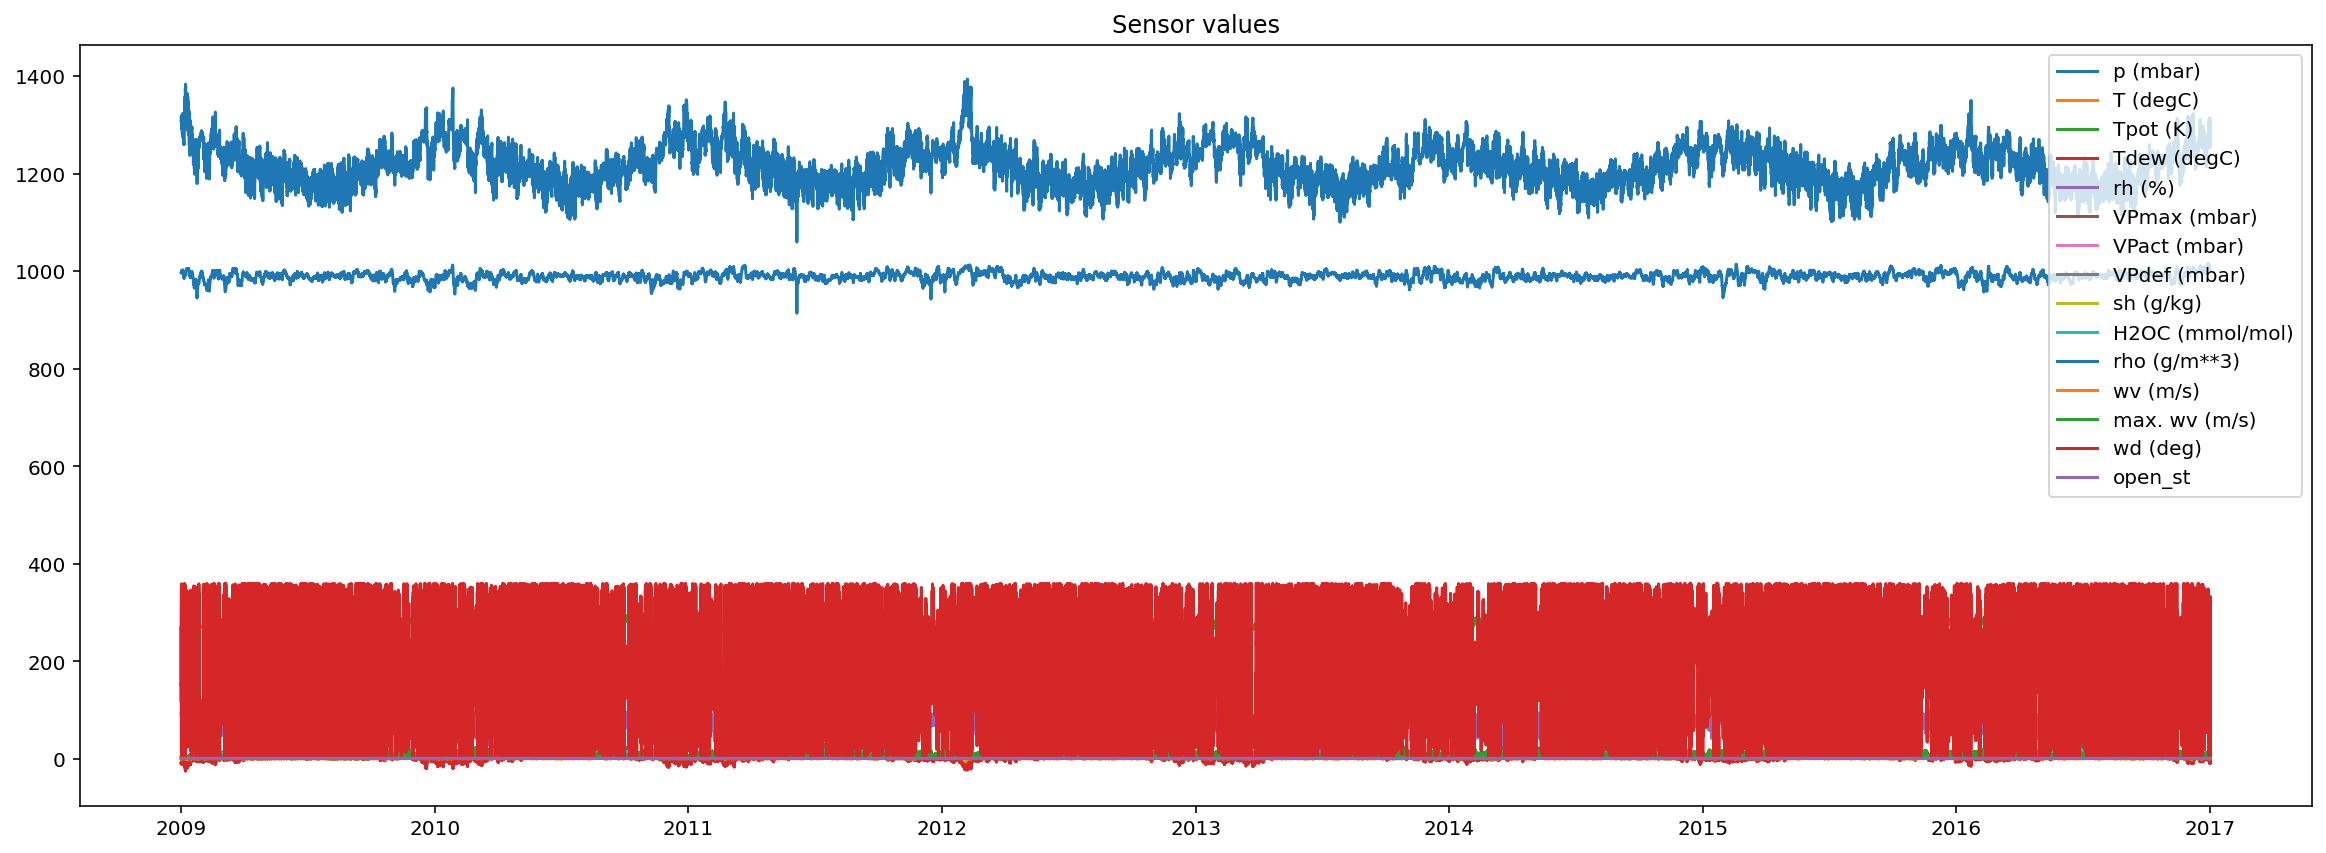

In [29]:
plt.figure(figsize=(20, 7))

for col in clean_data.columns:
    plt.plot(clean_data[col], label=col)

plt.legend(loc='upper right')
plt.title('Sensor values')

plt.show()

### Sensor-level view & analysis

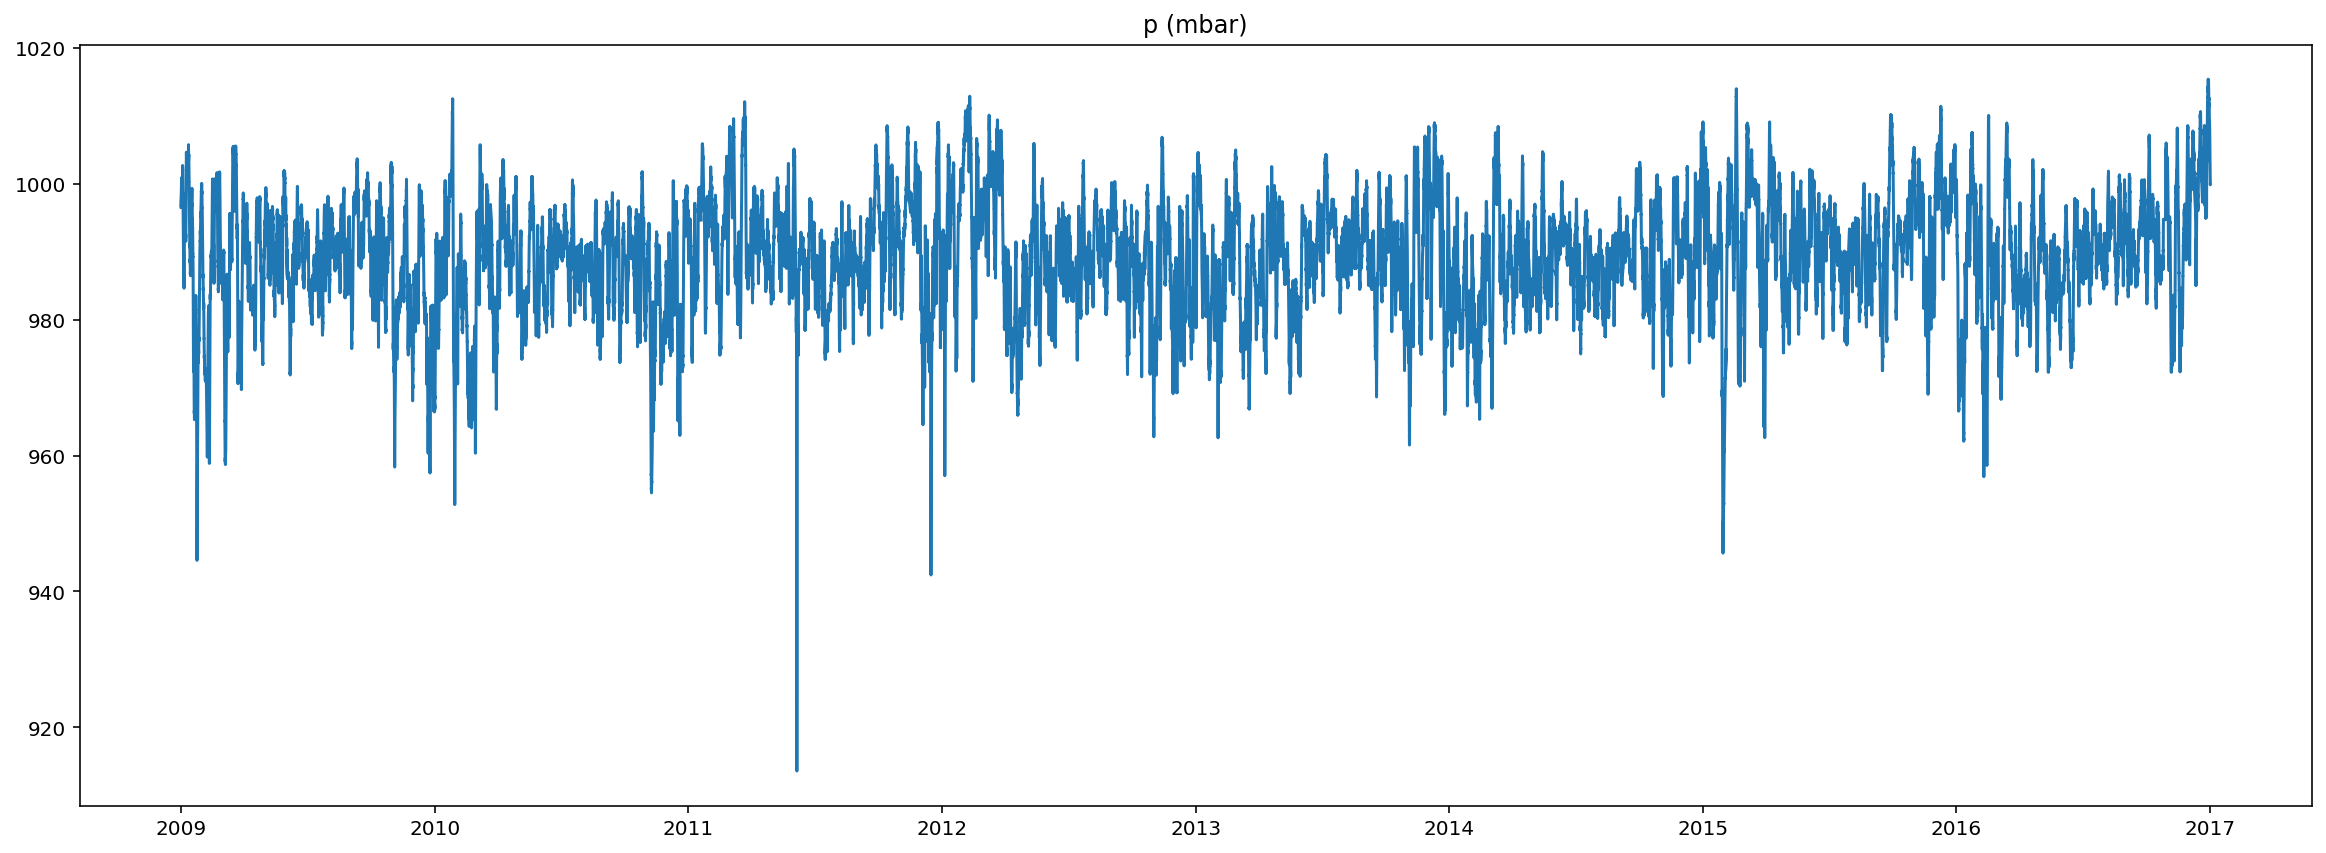

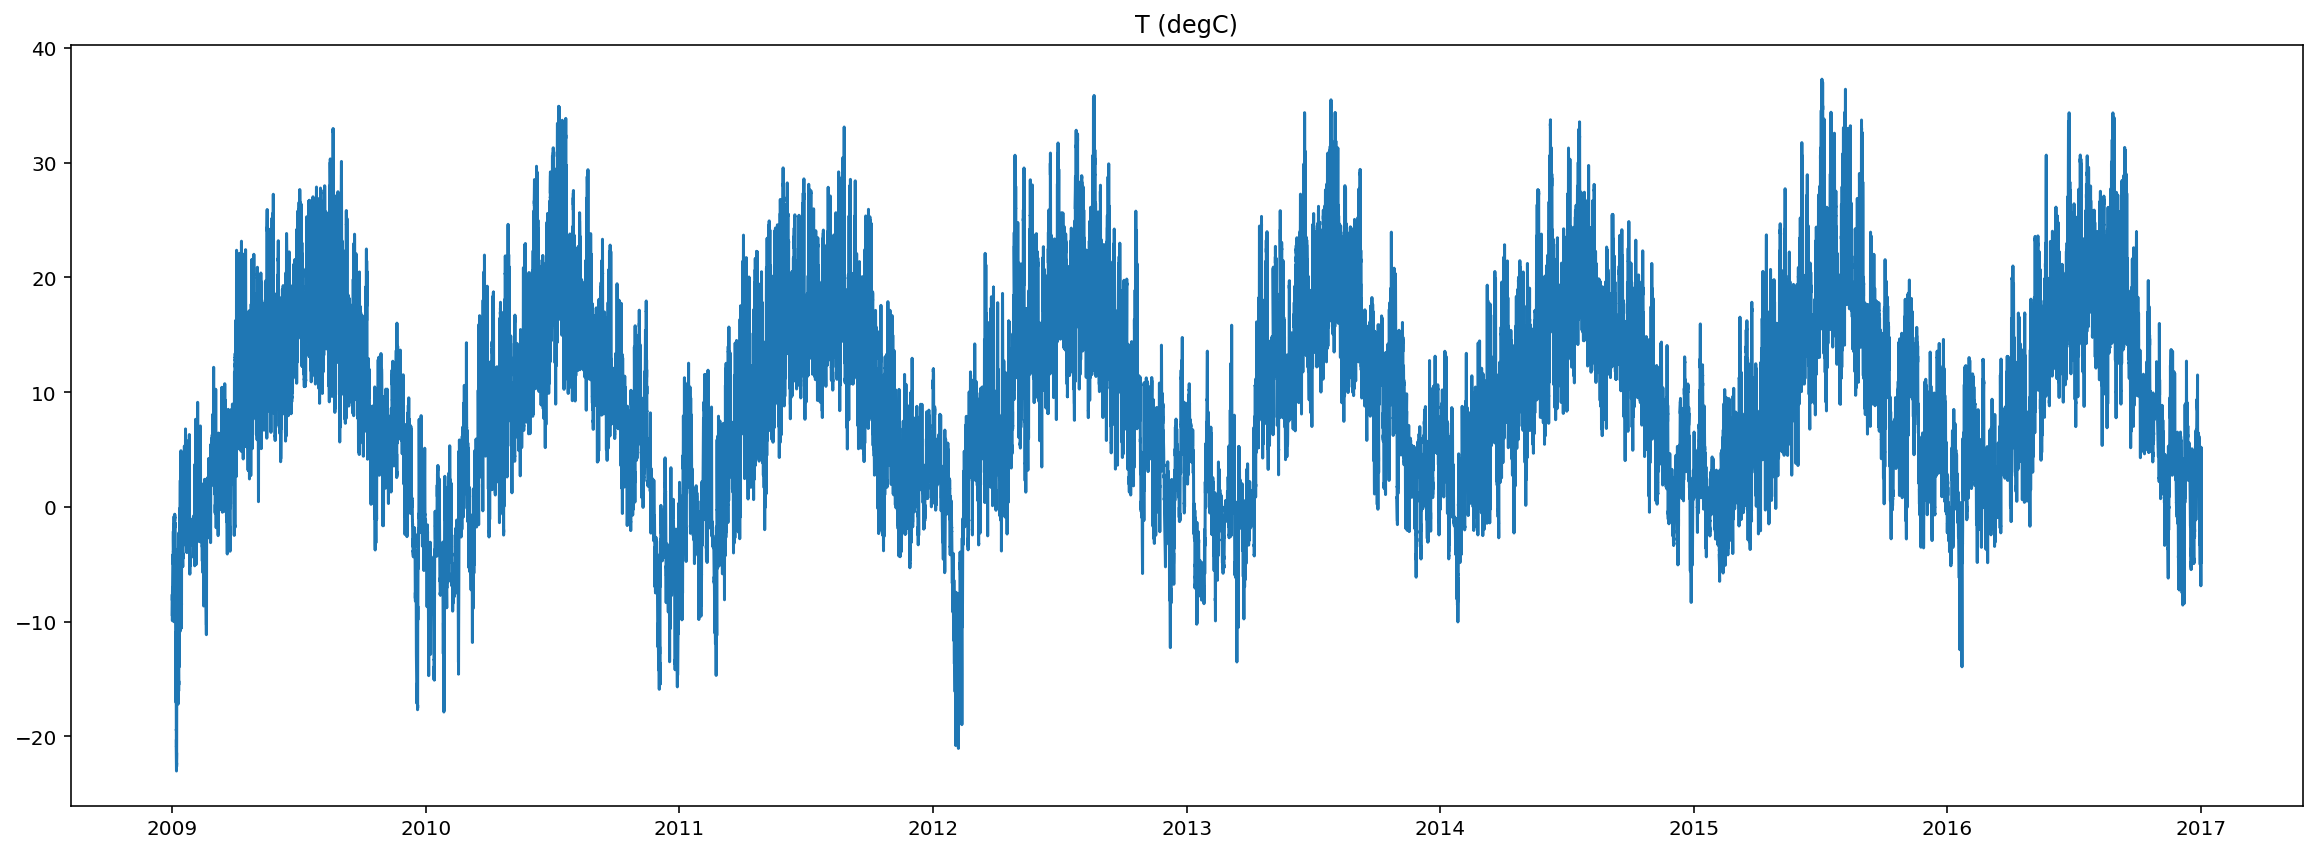

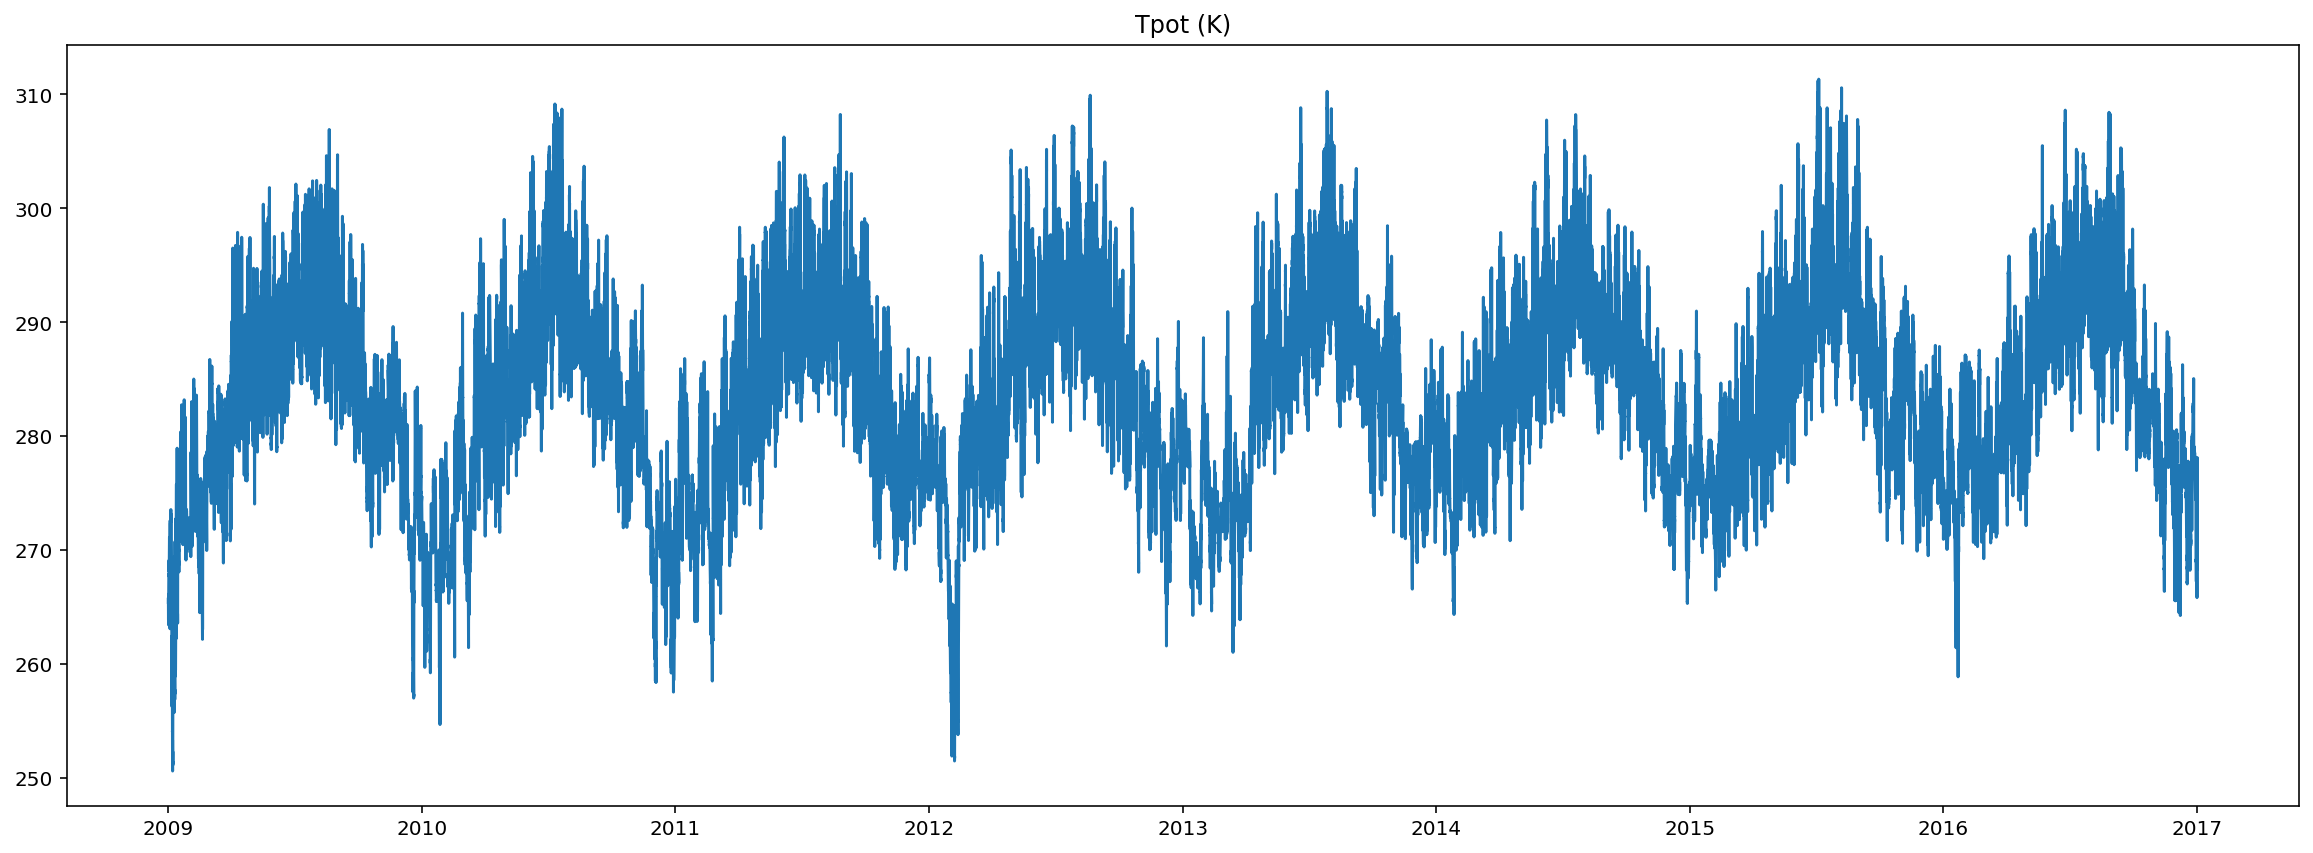

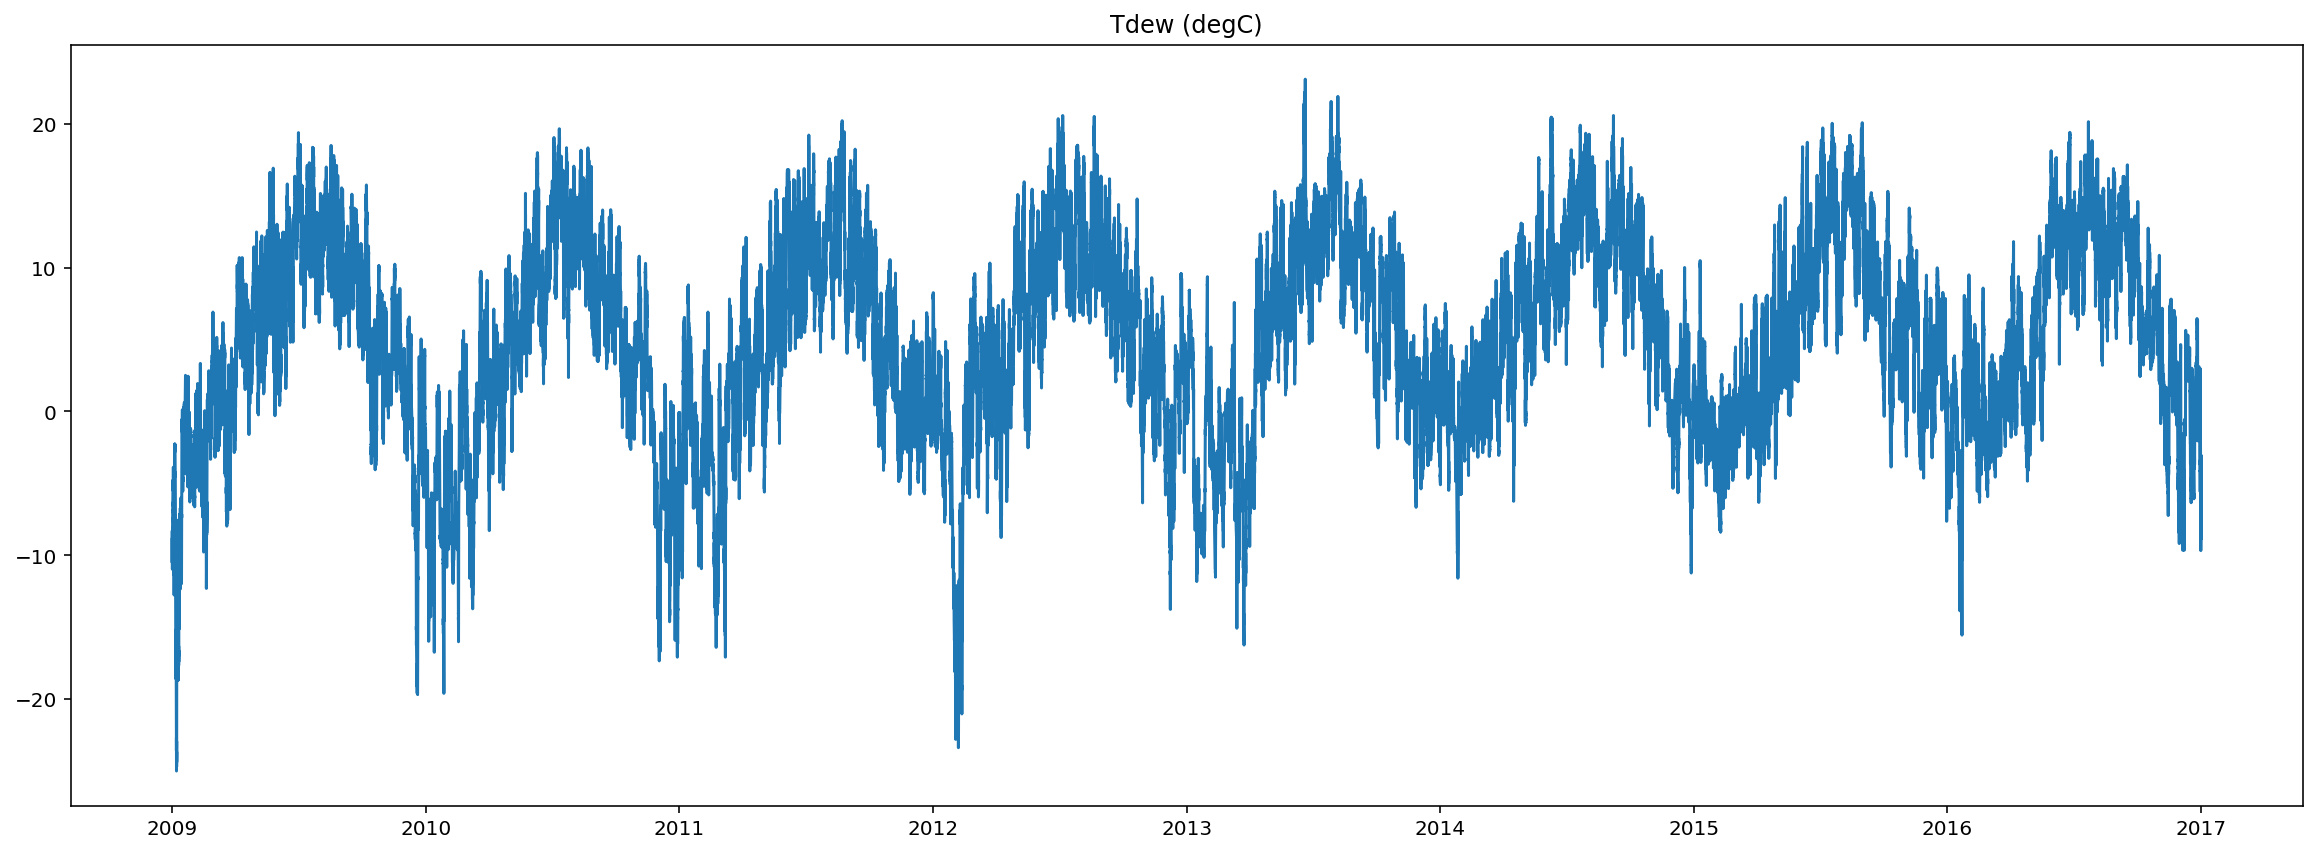

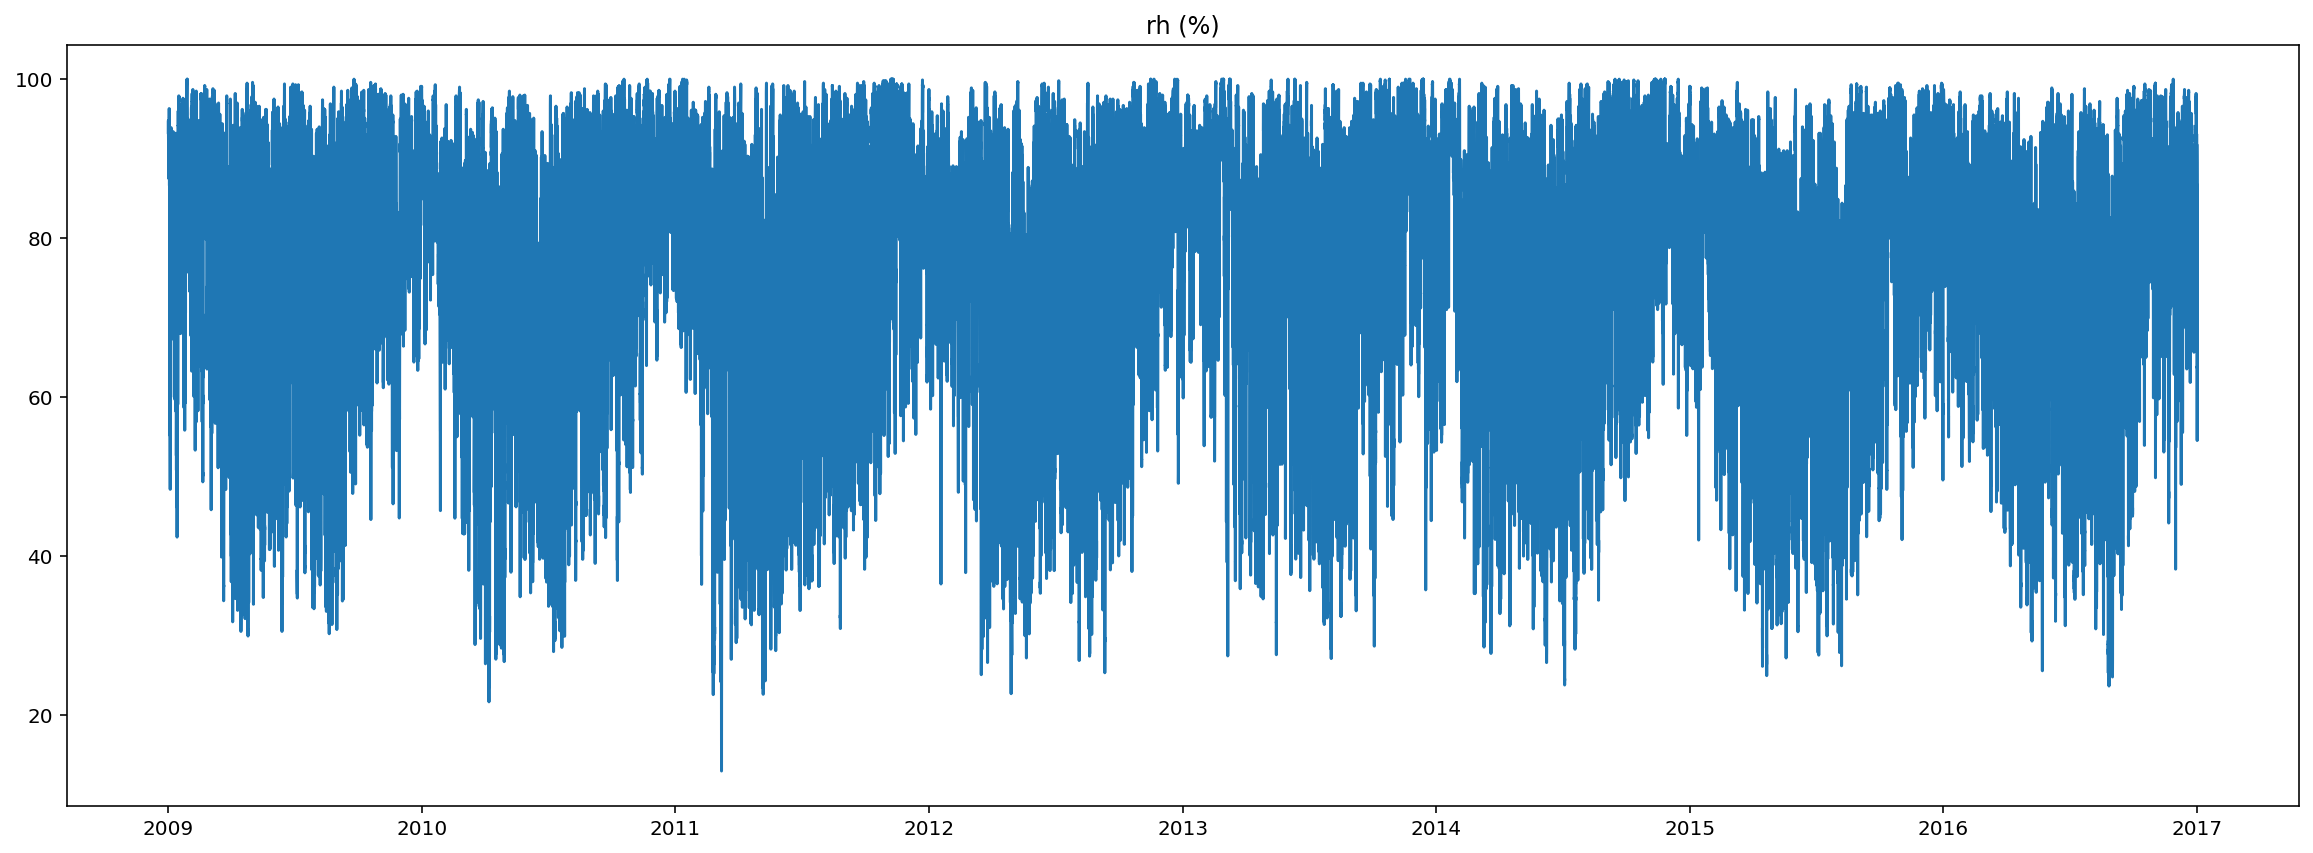

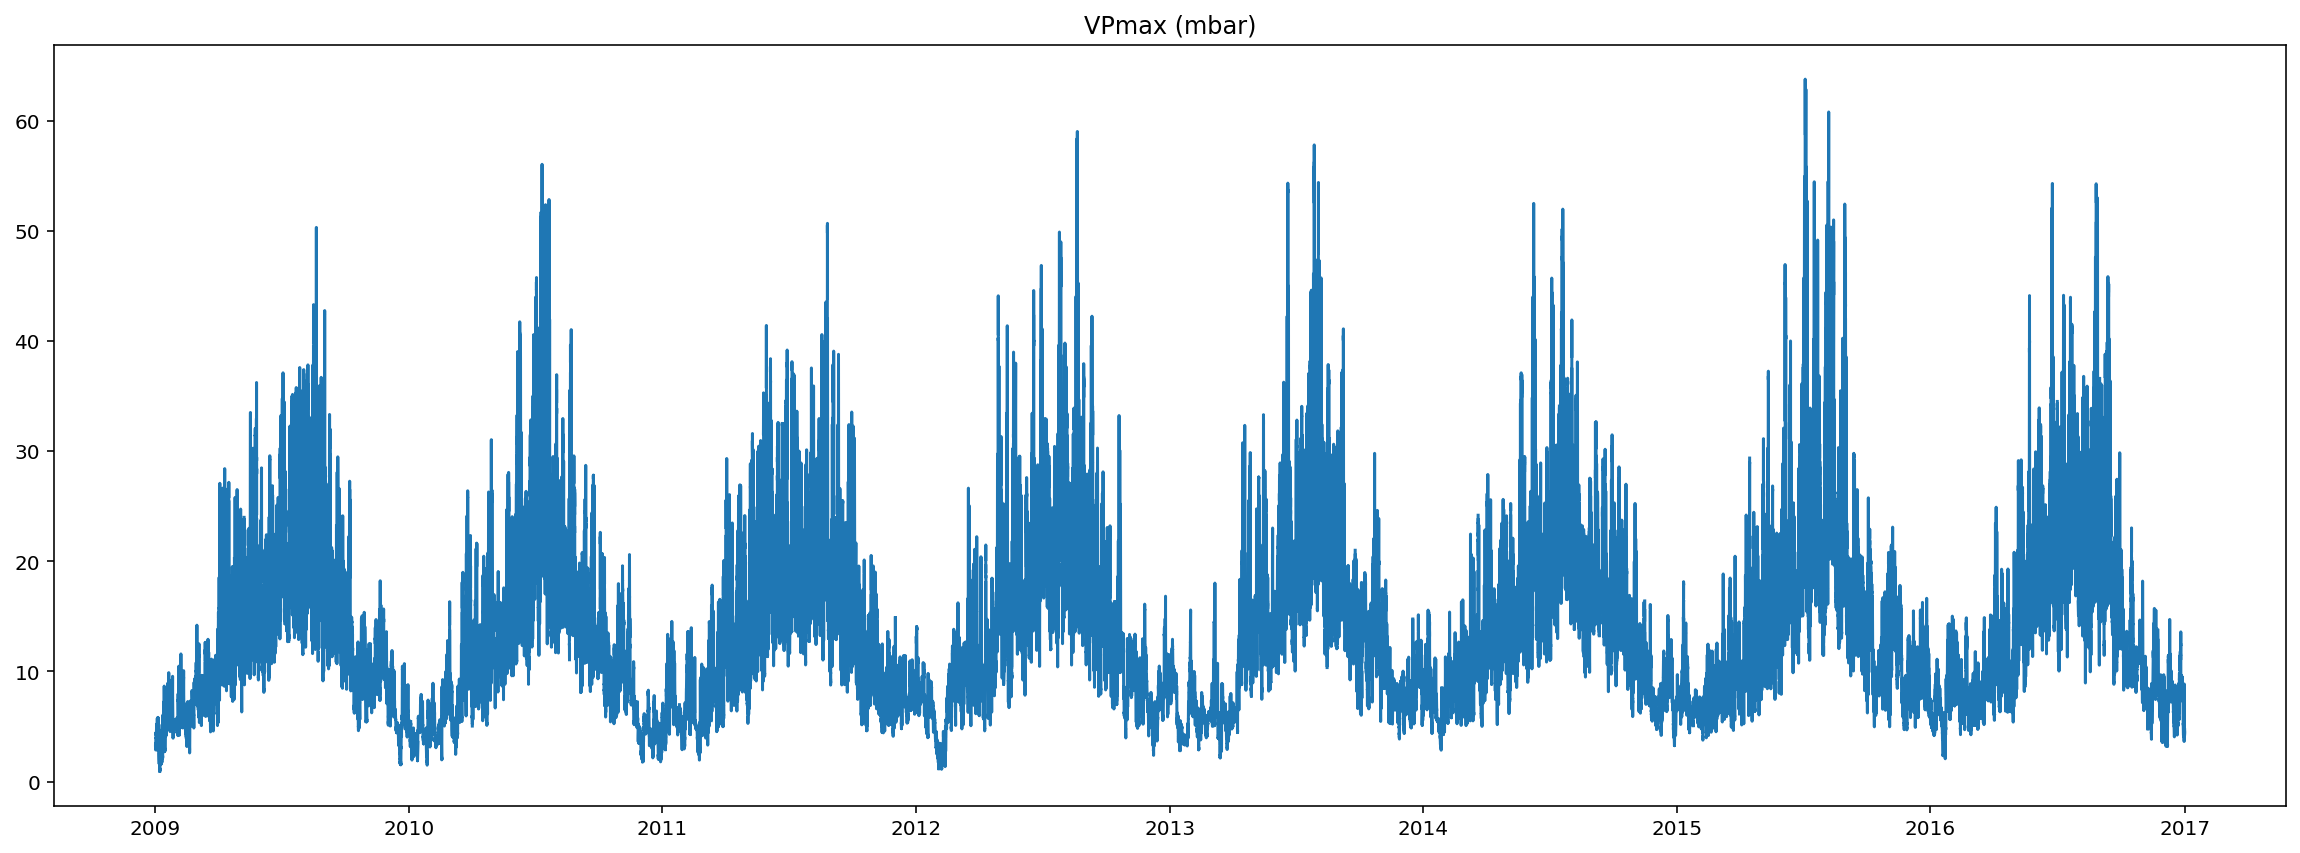

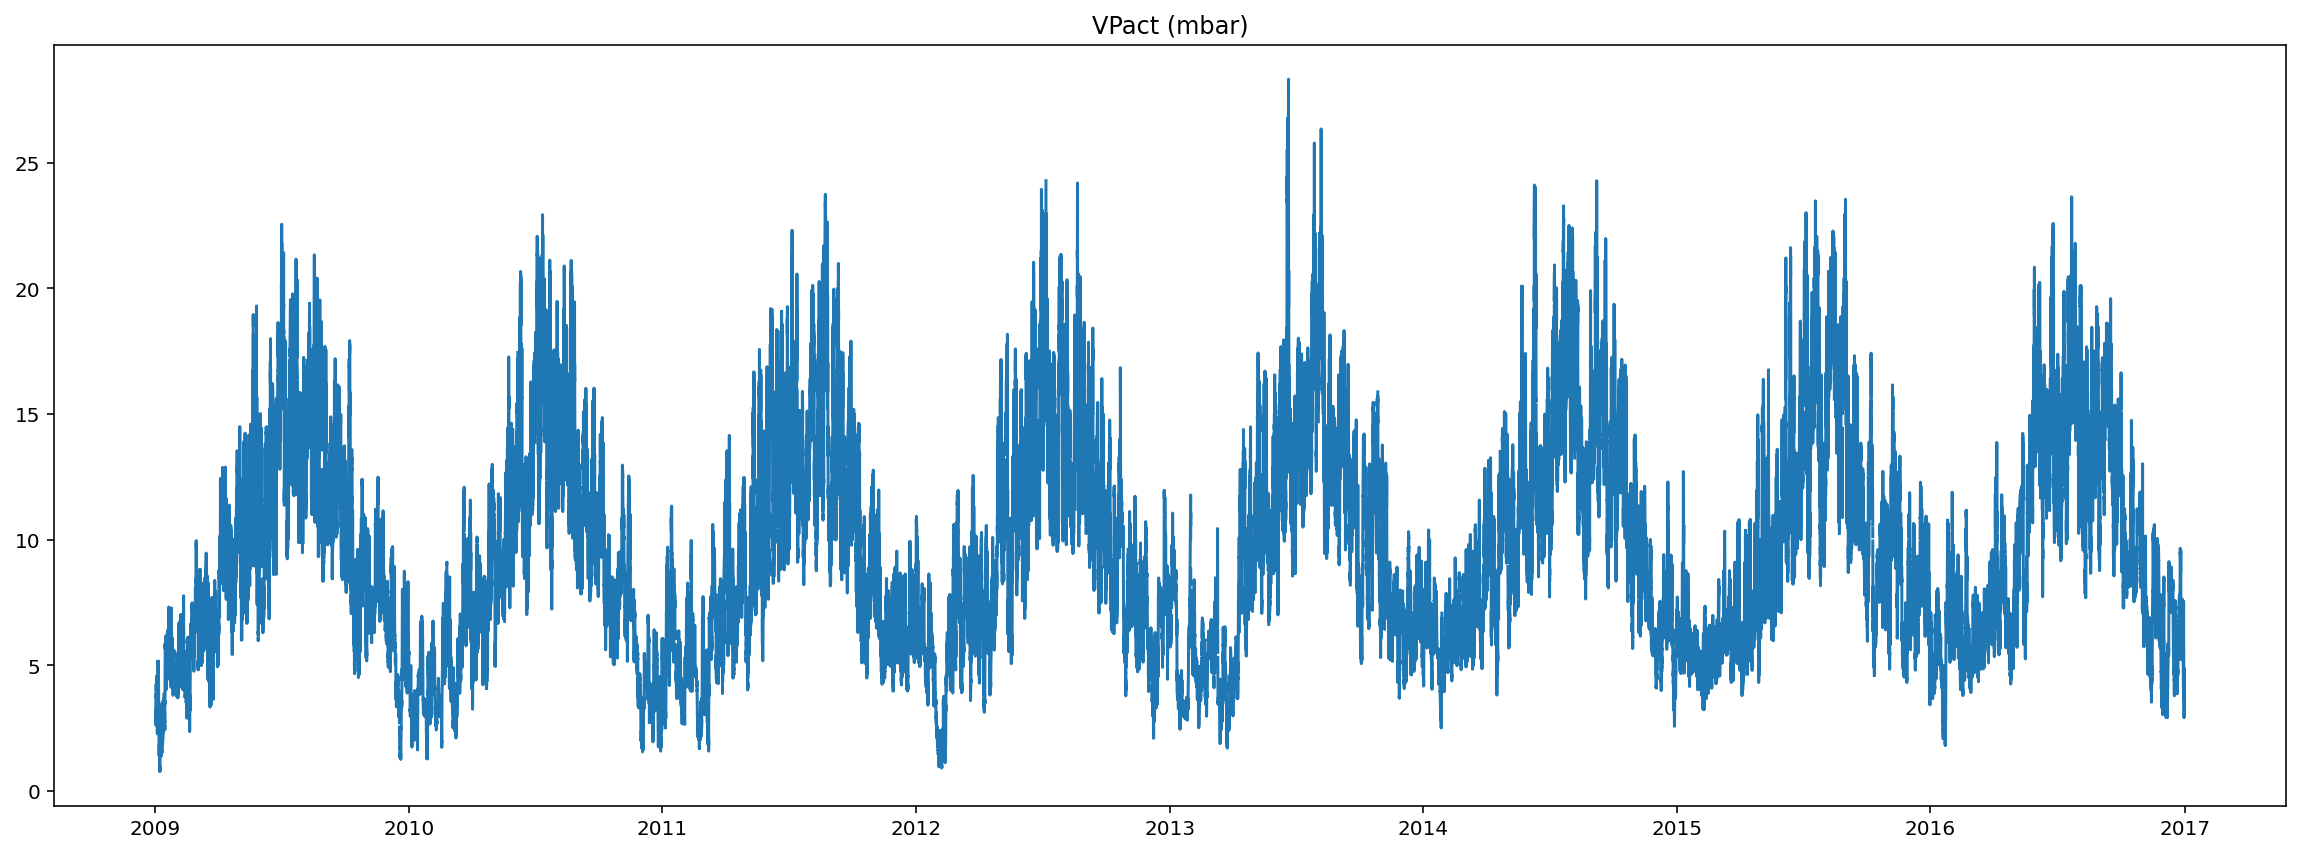

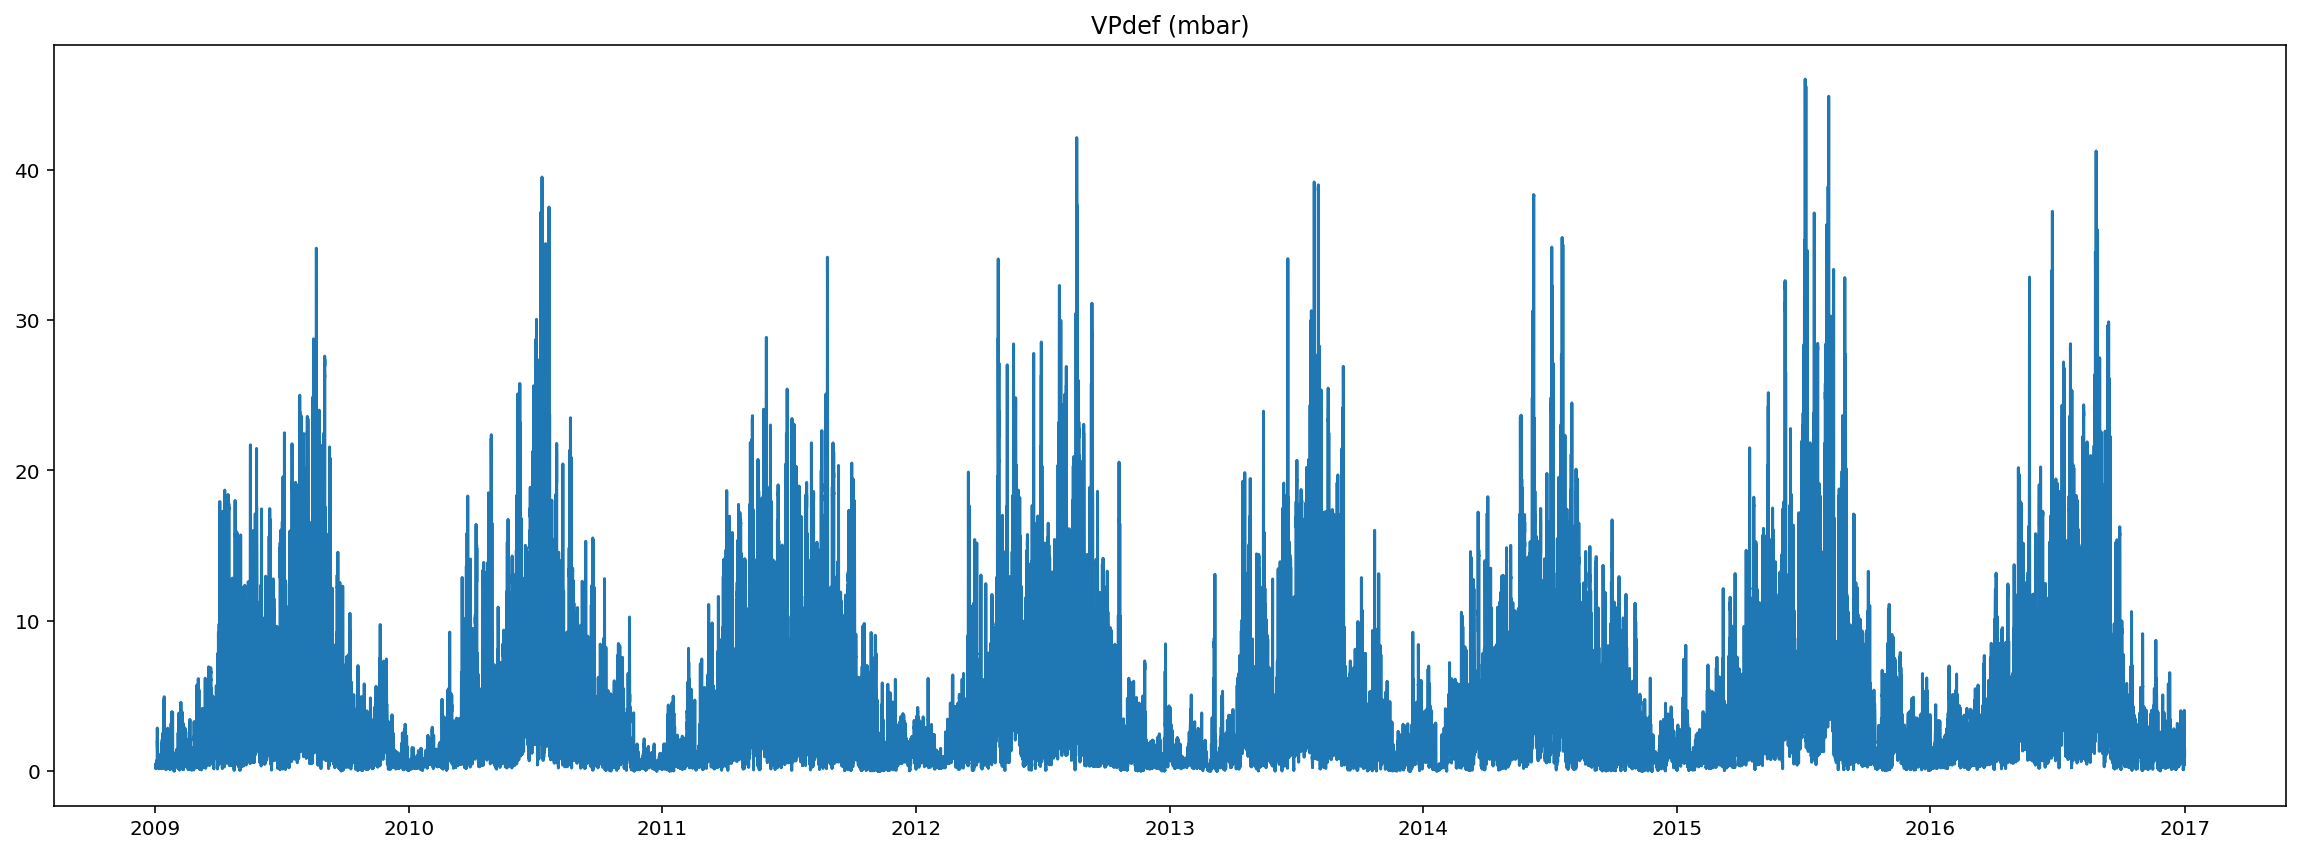

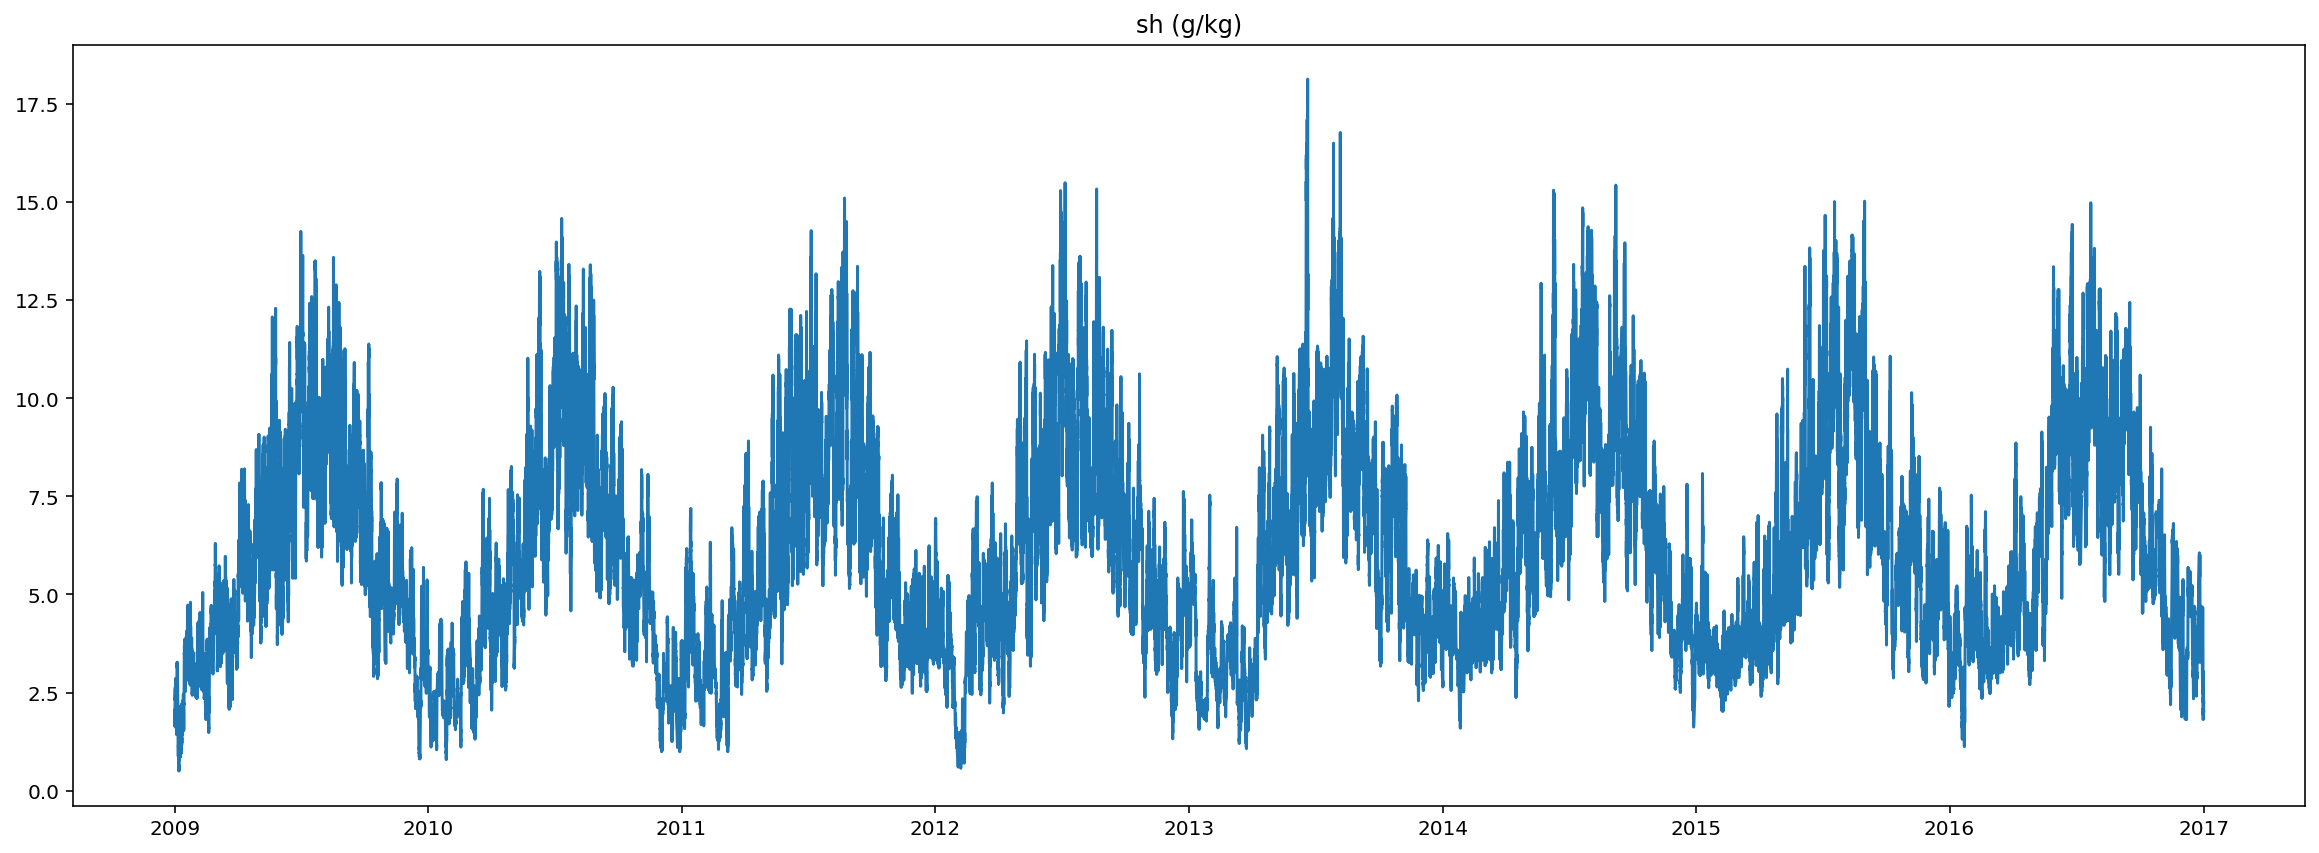

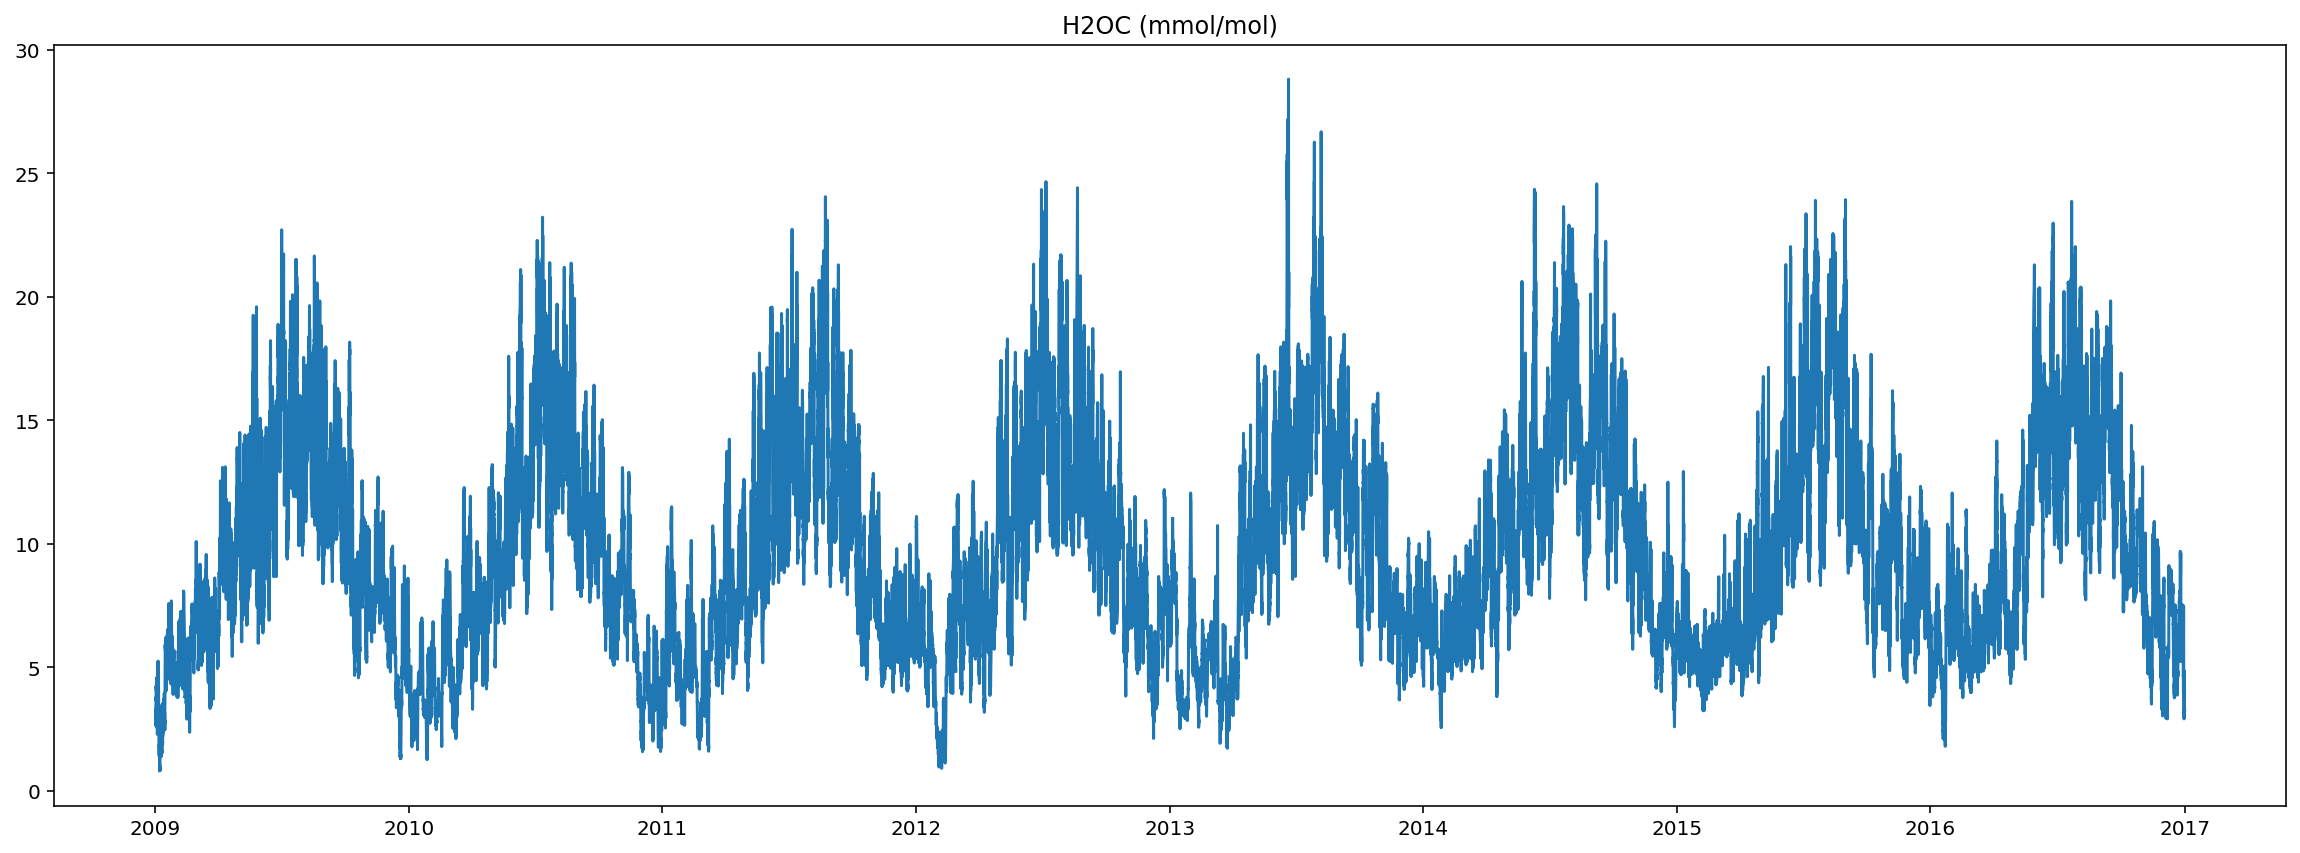

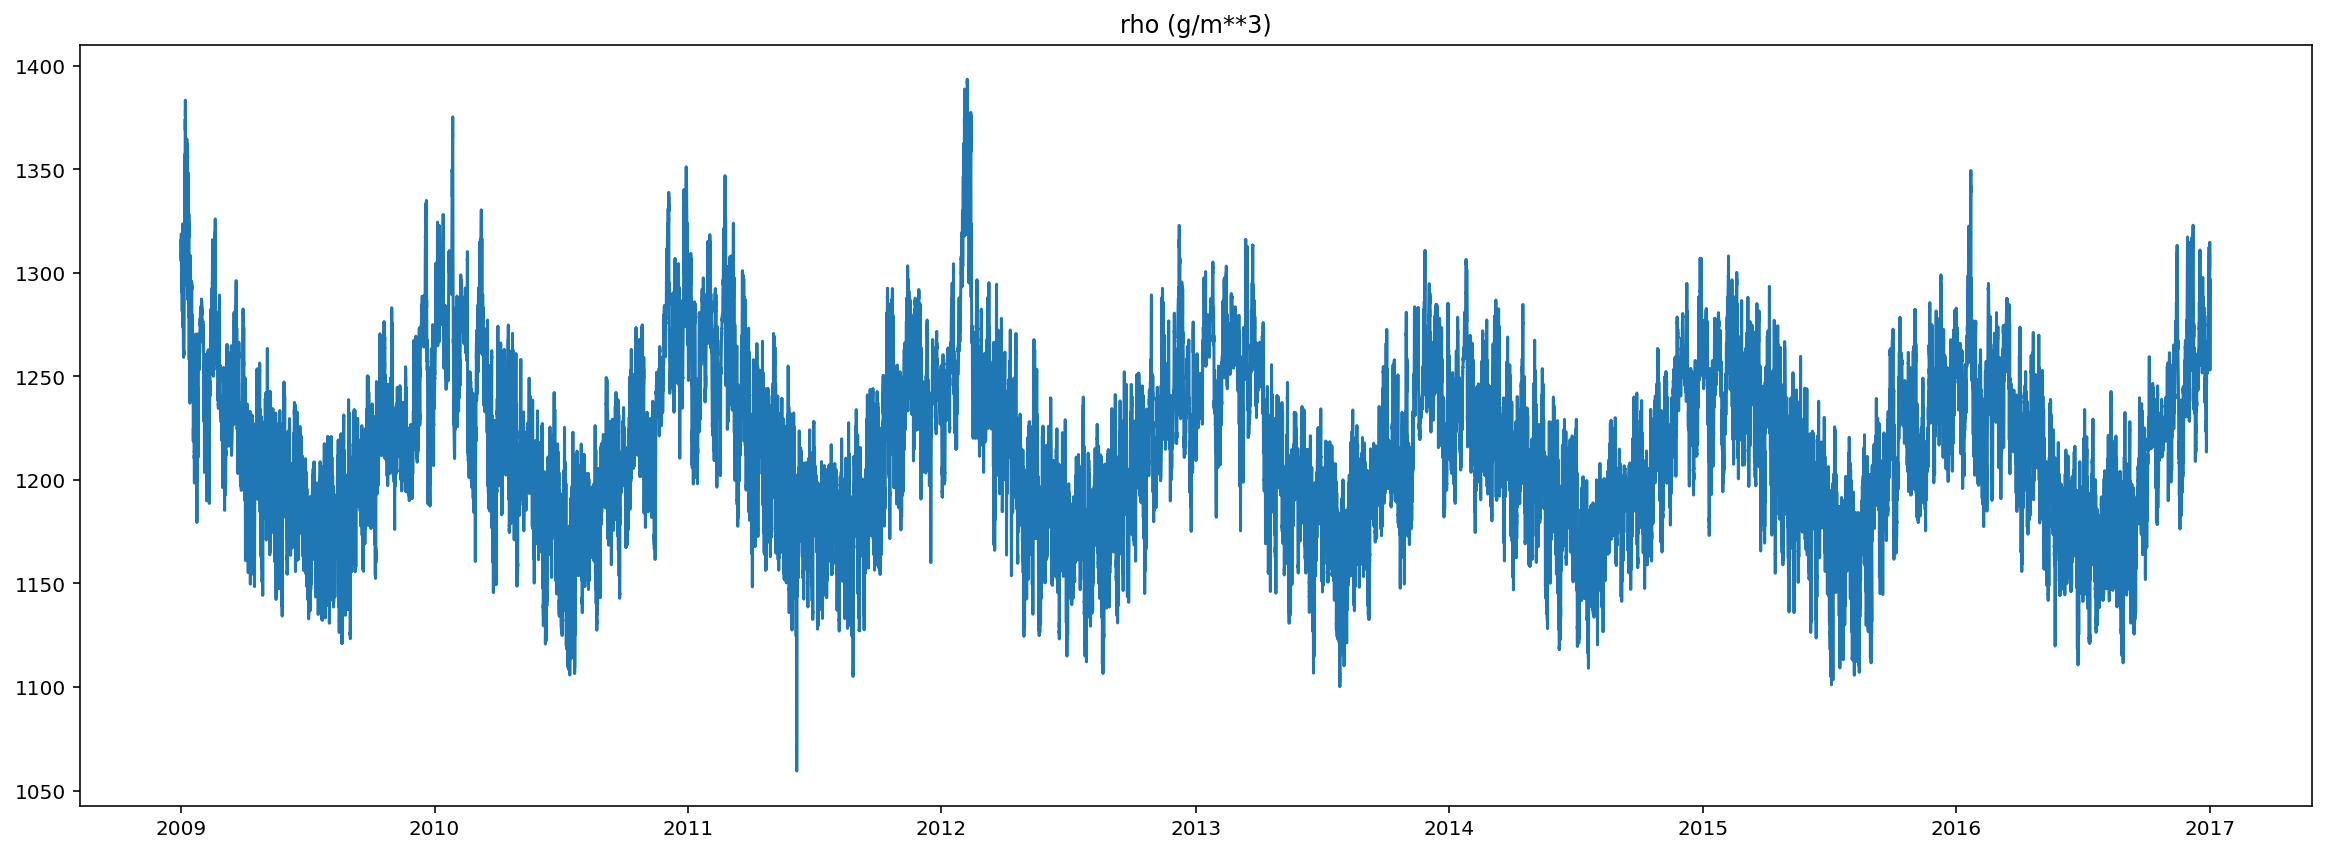

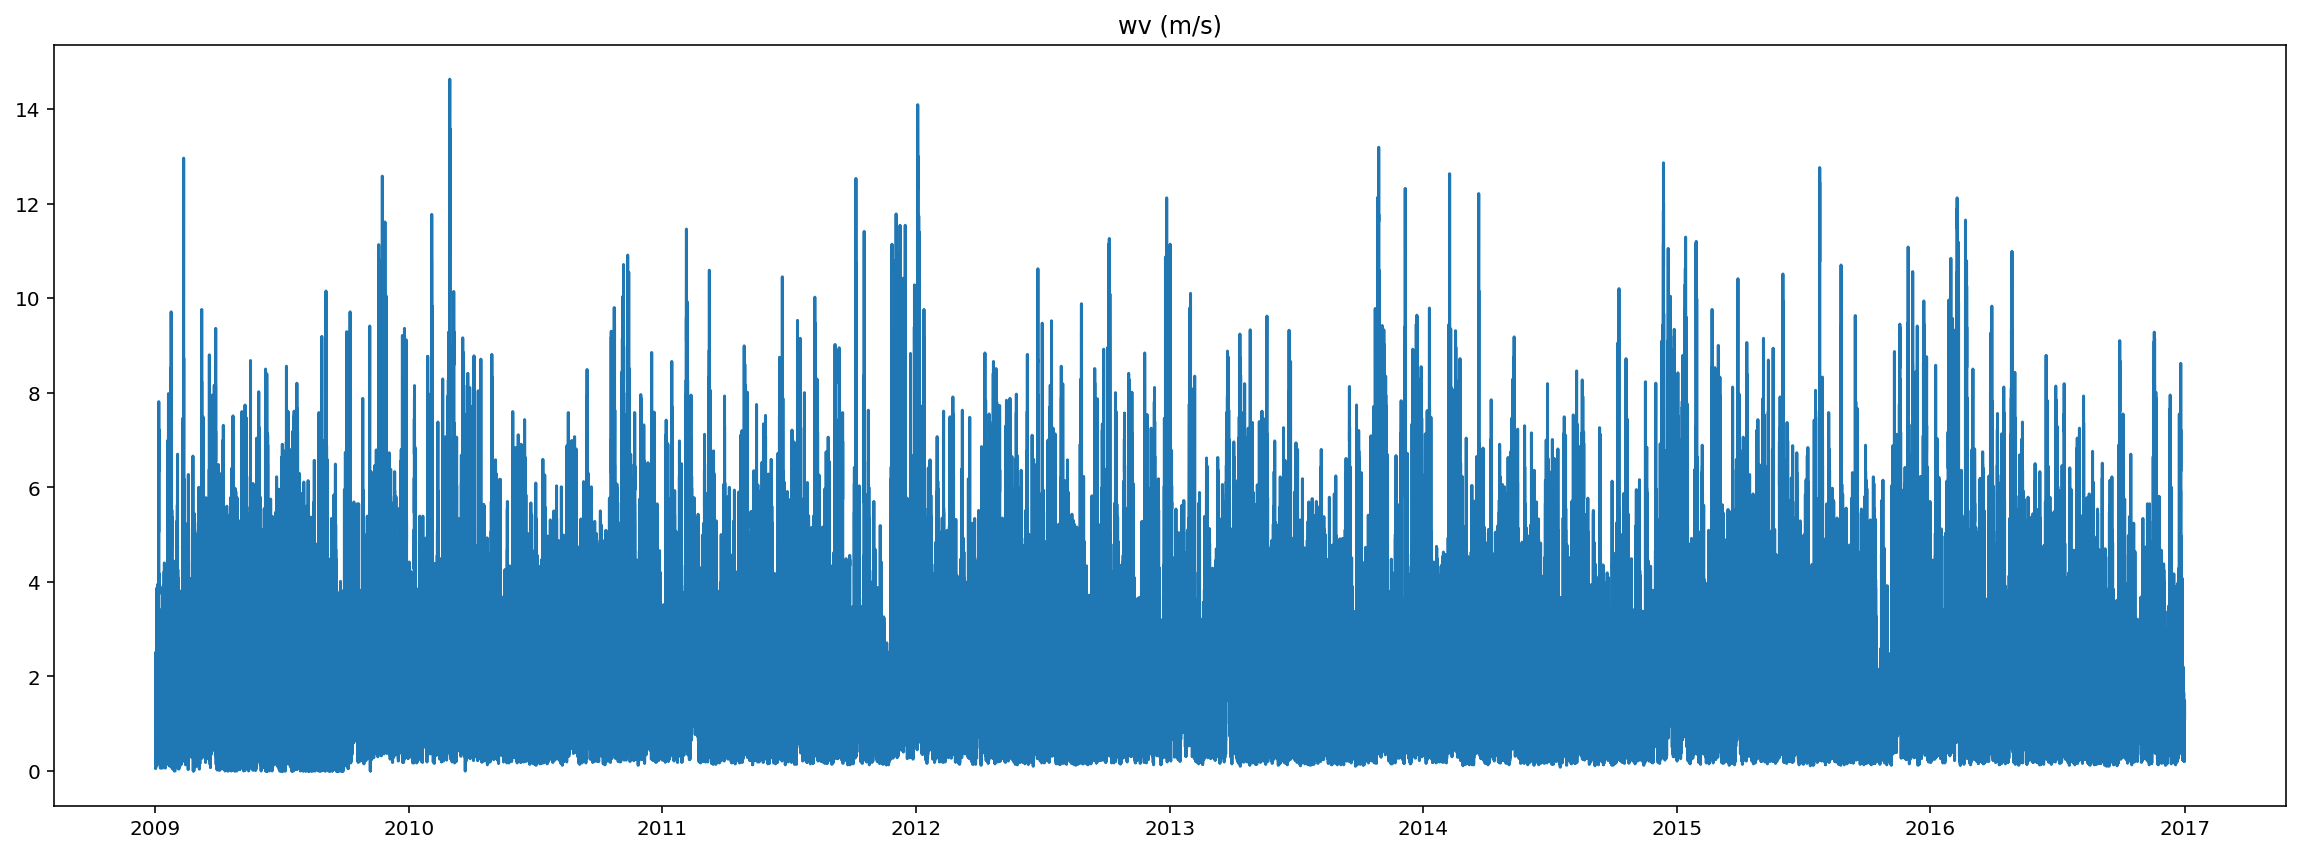

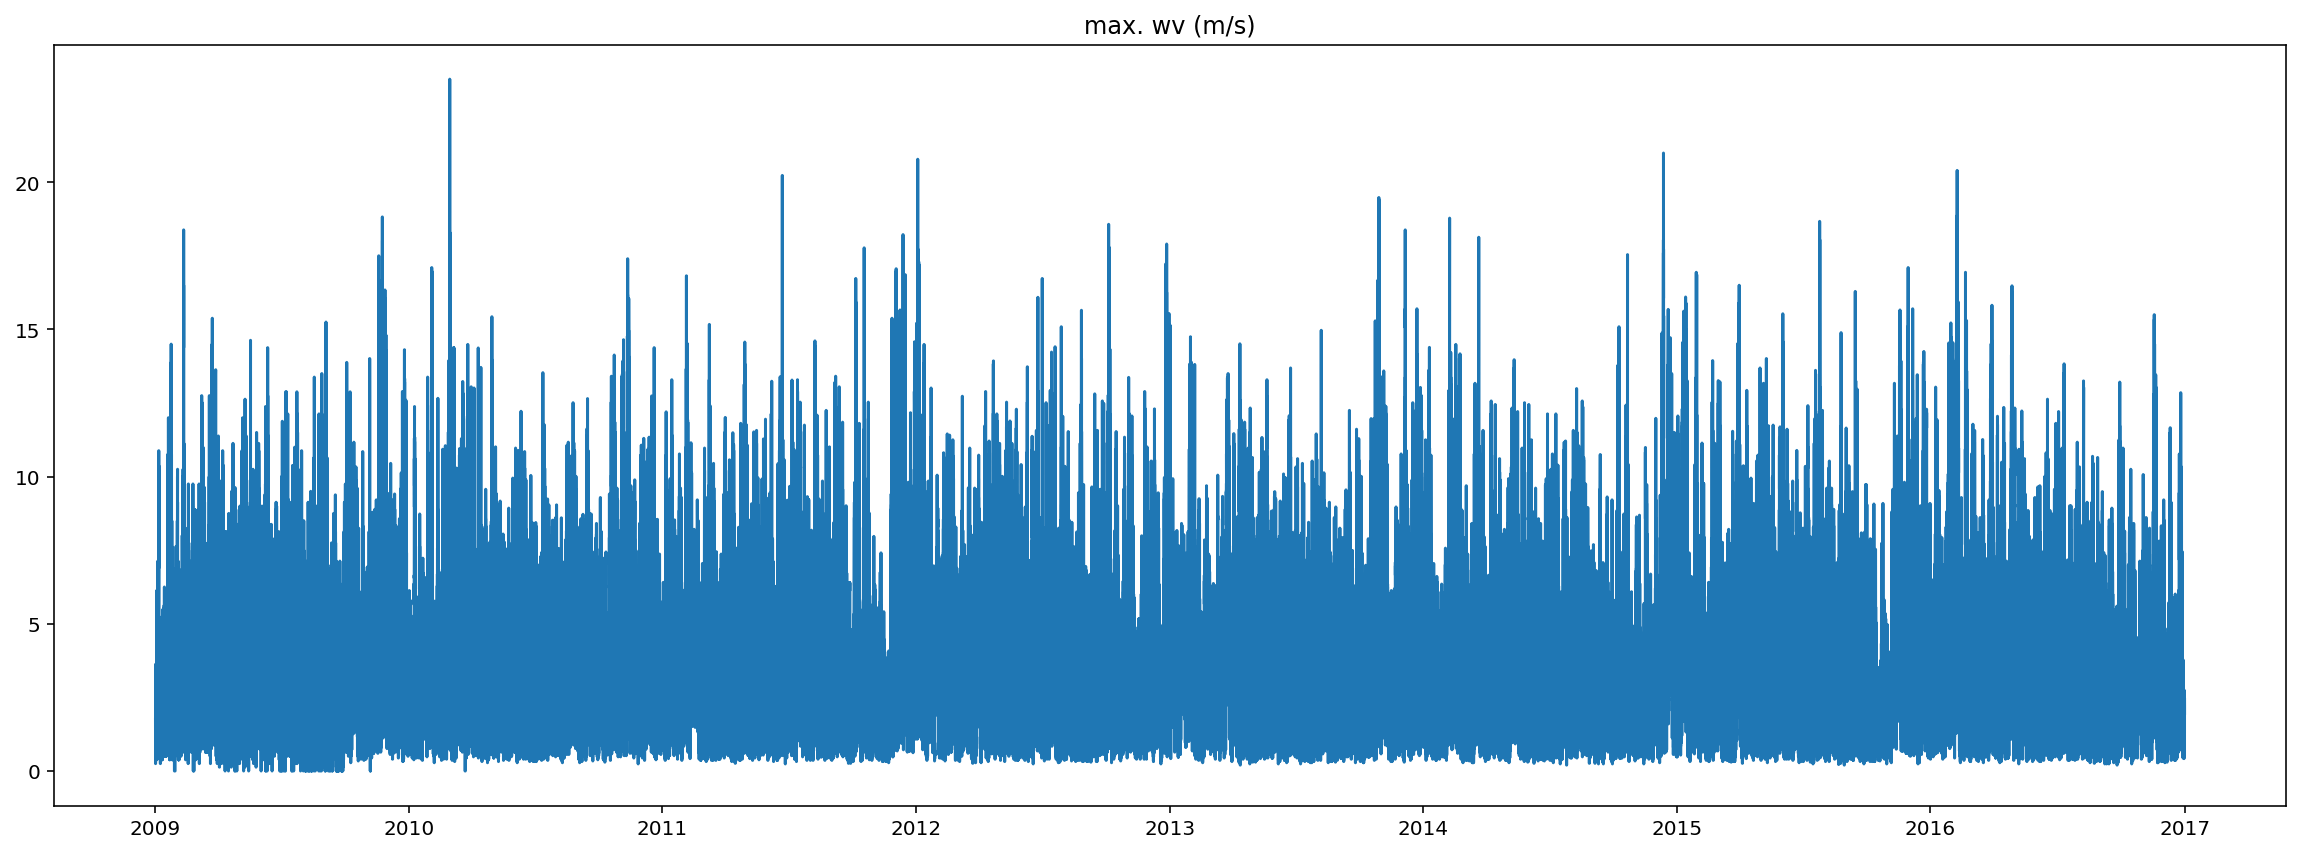

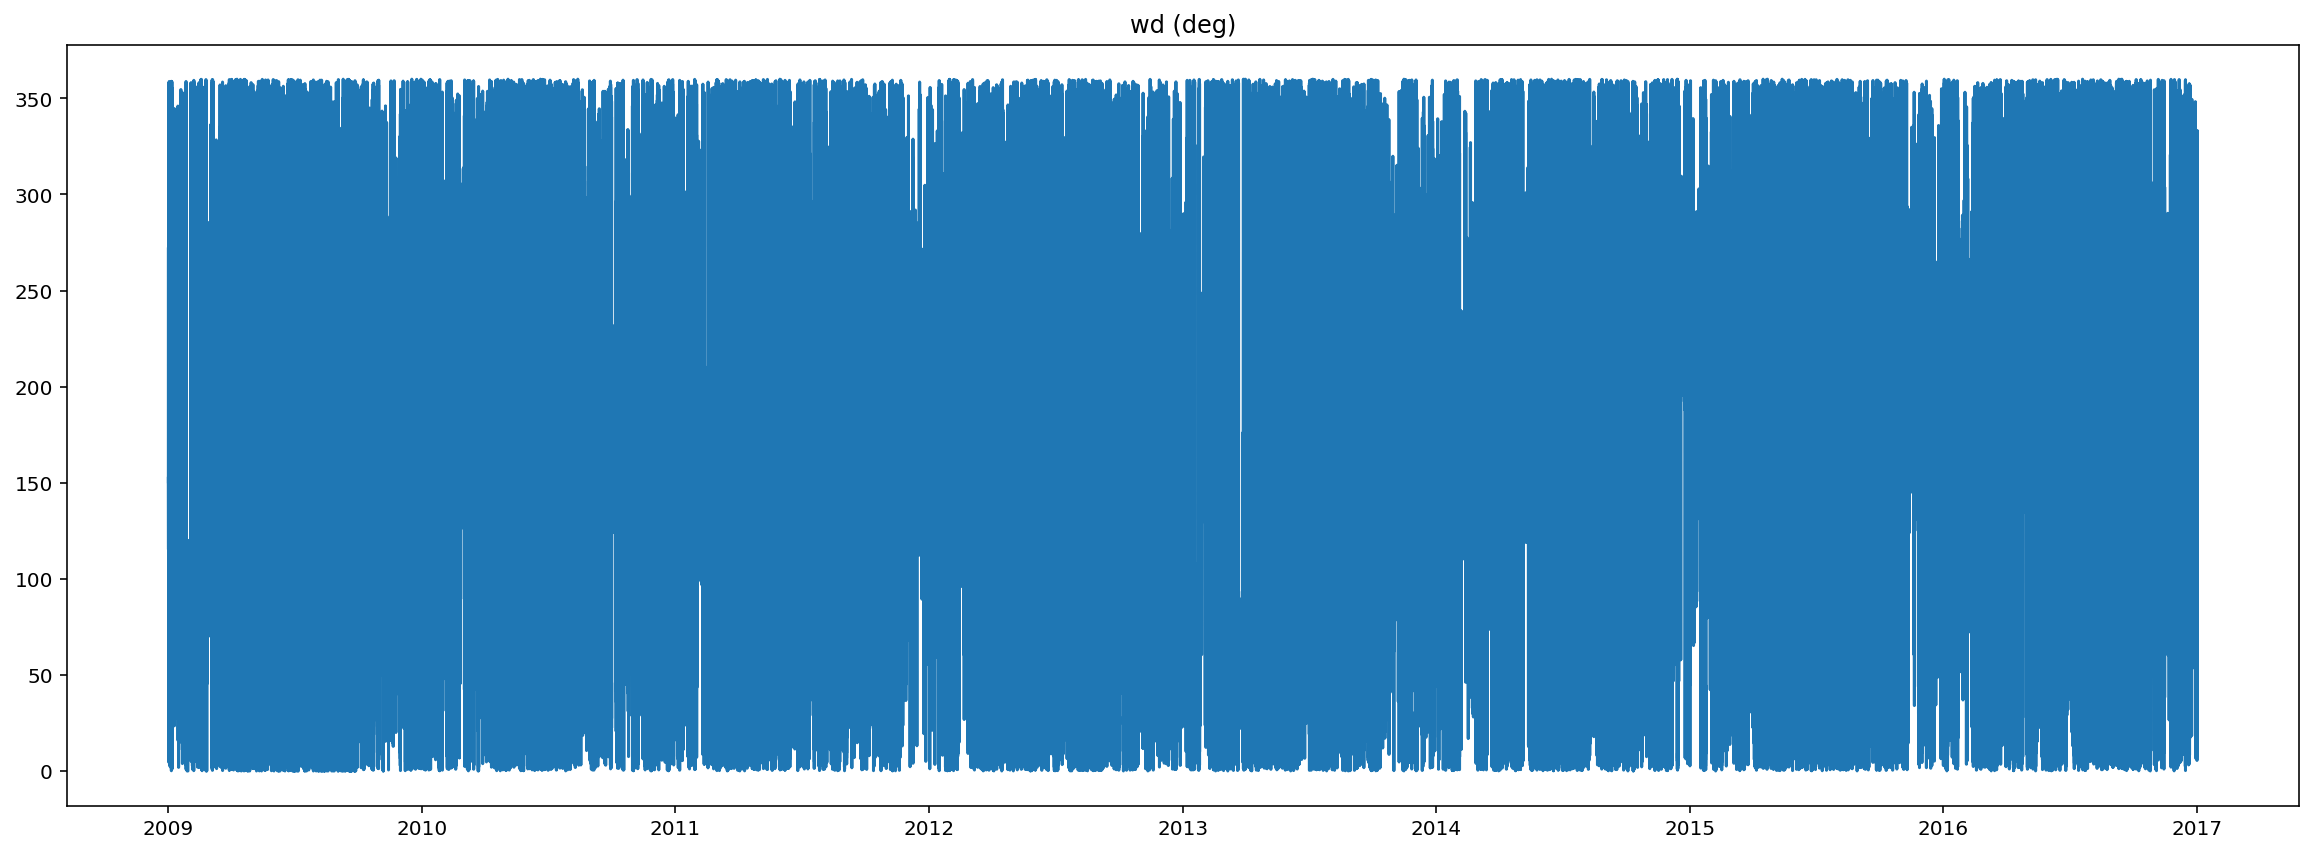

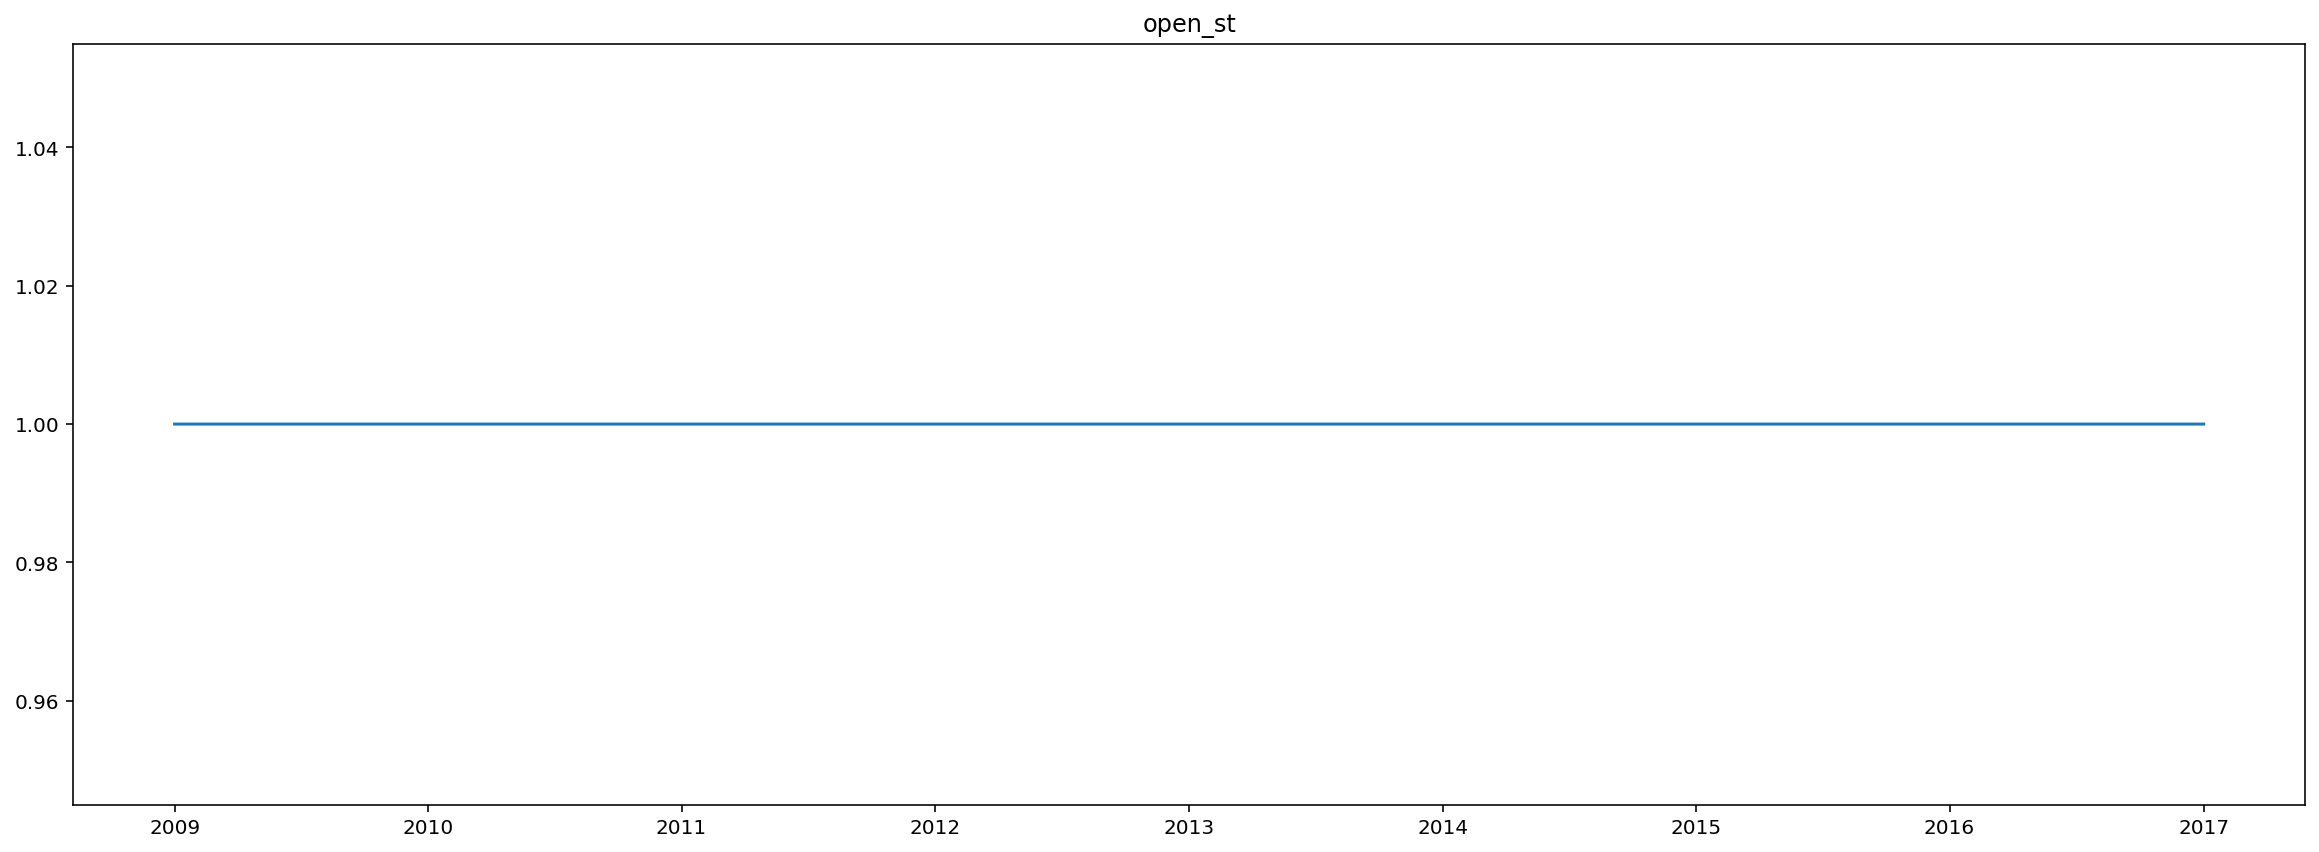

In [30]:
for col in clean_data.columns:
    
    plt.figure(figsize=(20, 7))
    plt.plot(clean_data[col])
    plt.title(col)
    
    plt.show()

## Anomalies detection

### Definition

- An anomaly is an outlier data point, which does not follow the collective common pattern of the majority of the data points and hence can be easily separated or distinguished from the rest of the data.

- In our case, we can try to identify abnormal temperatures over the period.

In [31]:
clean_data.head()

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
Date Time                                                                
2009-01-01 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
2009-01-01 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2009-01-01 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
2009-01-01 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
2009-01-01 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

                     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                                  
2009-01-01 00:10:00          3.33          3.11          0.22       1.94   
2009-01-01 00:20:00          3.23          3.02          0.21       1.89   
2009-01-01 00:30:00          3.21          3.01          0.20       1.88   
2009-01-01 00:40:00          3.26          3.07          0.19       1.92   
2009-01-01 00:50:00          3.27          3.08          0.19       1.92   

                     H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  \
Date Time                                                                     
2009-01-01 00:10:00             3.12       1307.75      1.03           1.75   
2009-01-01 00:20:00             3.03       1309.80      0.72           1.50   
2009-01-01 00:30:00             3.02       1310.24      0.19           0.63   
2009-01-01 00:40:00             3.08       1309.19      0.34           0.50   
2009-01-01 00:50:00             3.09       1309.00      0.32           0.63   

                     wd (deg)  open_st  
Date Time                               
2009-01-01 00:10:00     152.3      1.0  
2009-01-01 00:20:00     136.1      1.0  
2009-01-01 00:30:00     171.6      1.0  
2009-01-01 00:40:00     198.0      1.0  
2009-01-01 00:50:00     214.3      1.0

### Fix threshold

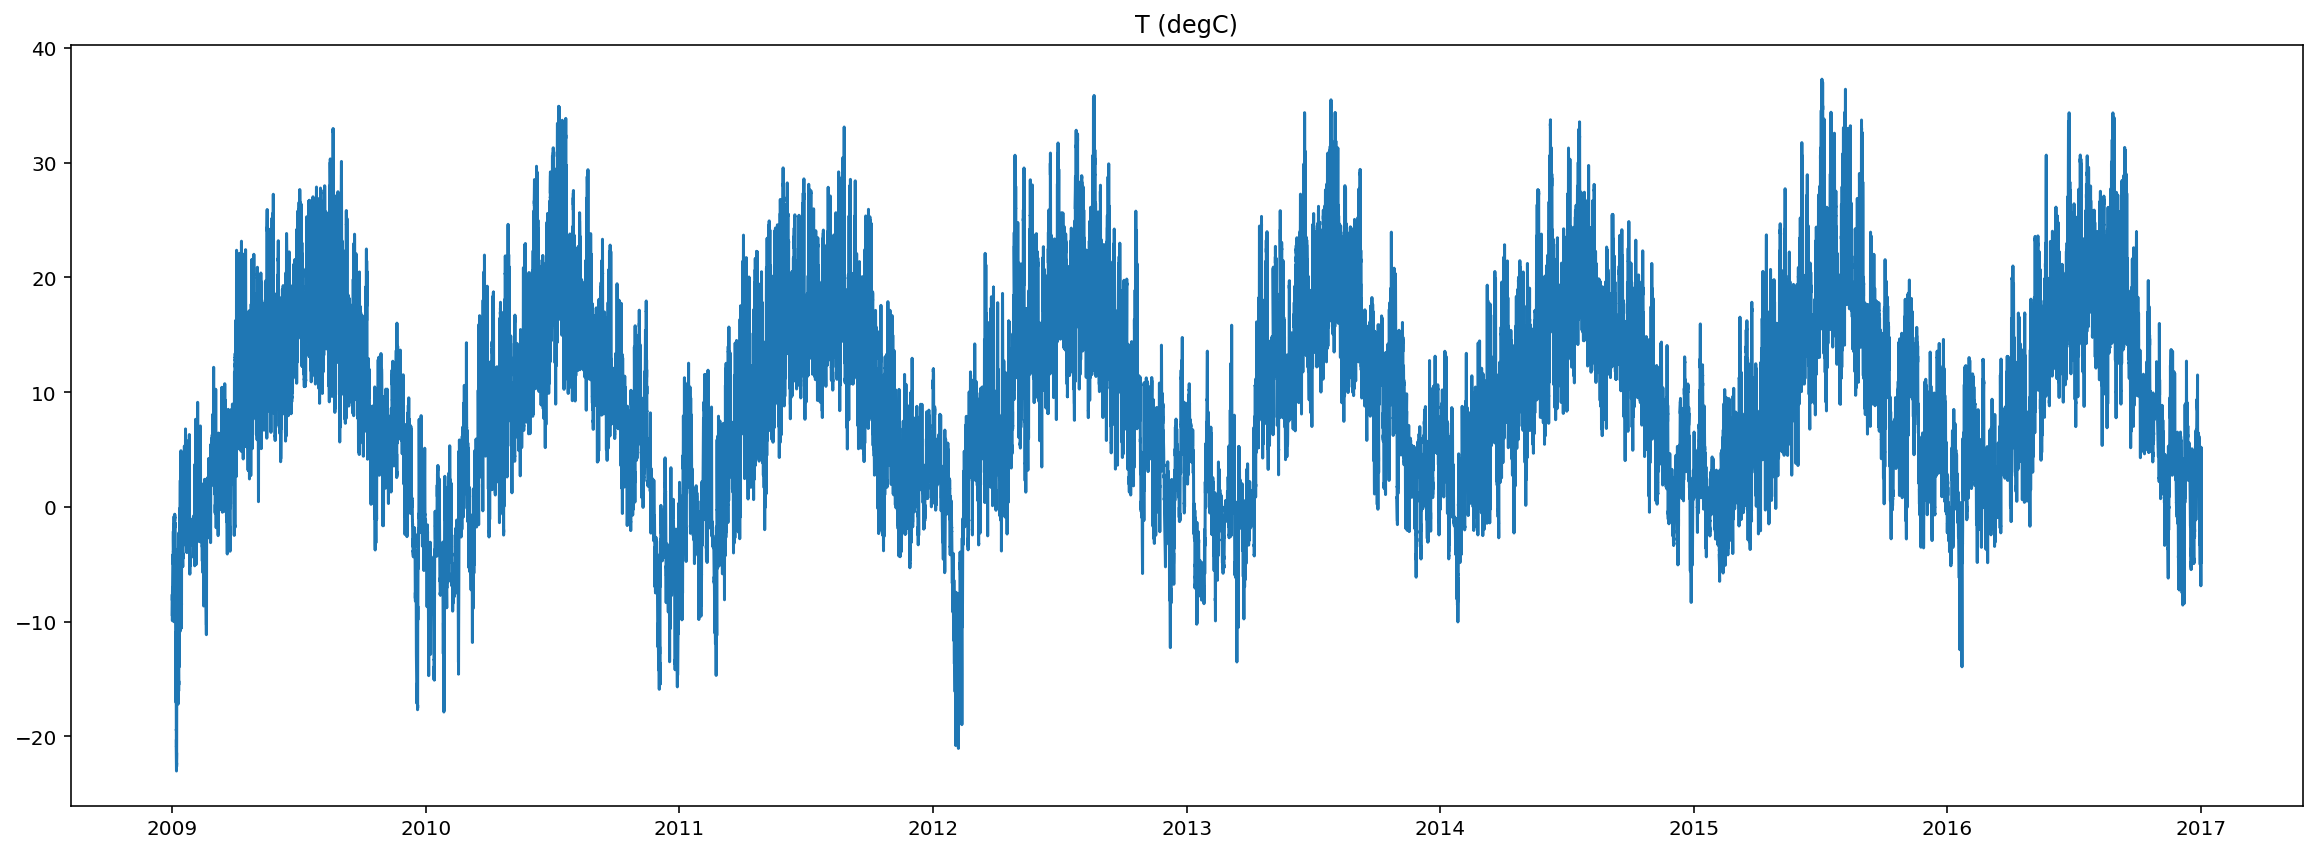

In [32]:
TAG_NAME = 'T (degC)'

plt.figure(figsize=(20, 7))

plt.plot(clean_data[TAG_NAME])
plt.title(TAG_NAME)

plt.show()

_What could be a relevant threshold to apply to this specific sensor ?_

Now, consider that we apply the following thresholds (upper/lower) for the specified sensors.

In [33]:
SENSORS_THRESHOLDS = {TAG_NAME:[-15, 34]}

Let's backtest our **fix threshold** strategy:

In [34]:
backtesting_df = clean_data.copy()

for col in SENSORS_THRESHOLDS.keys():
    upper_alert = (backtesting_df[col] > SENSORS_THRESHOLDS[col][1])
    lower_alert = (backtesting_df[col] < SENSORS_THRESHOLDS[col][0])
    
    backtesting_df[f'is_alert_{col}'] = (upper_alert | lower_alert).astype(int)

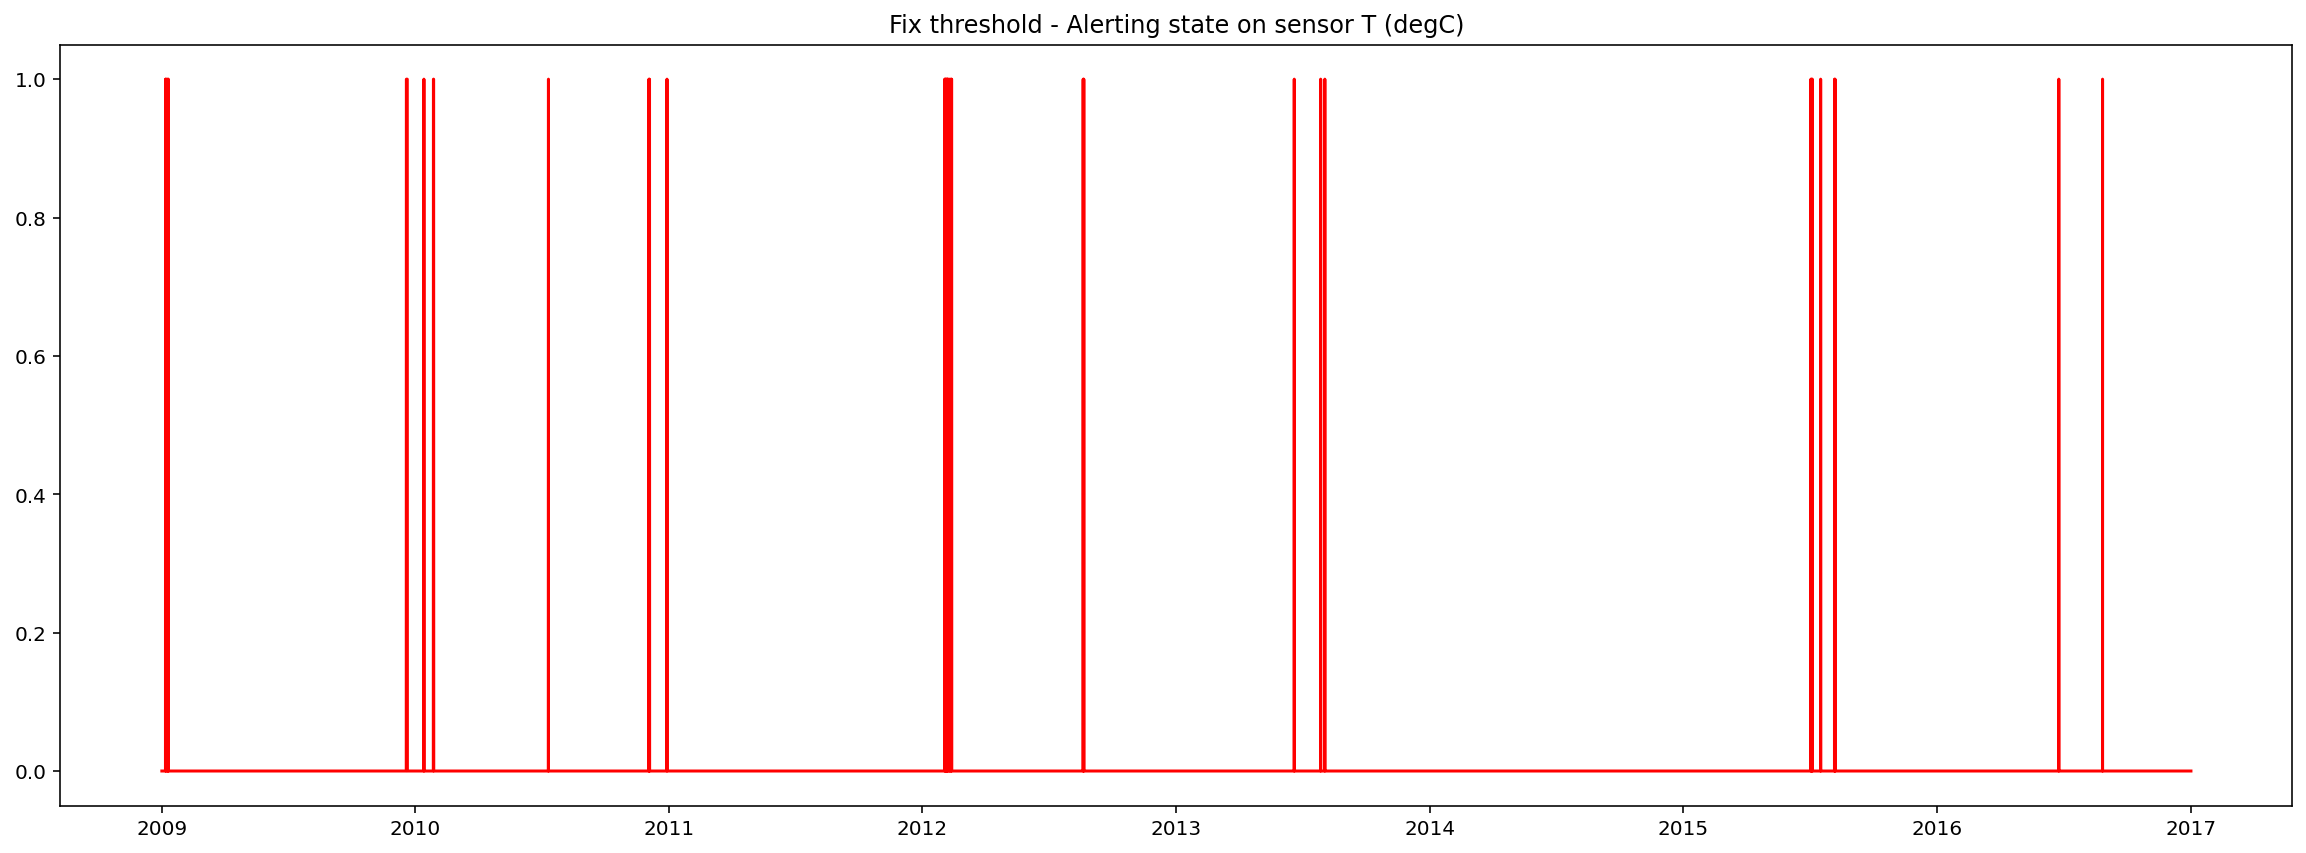

In [35]:
plt.figure(figsize=(20, 7))

plt.plot(backtesting_df[f'is_alert_{TAG_NAME}'], color='red')
plt.title(f'Fix threshold - Alerting state on sensor {TAG_NAME}')

plt.show()

### Statistical profiling

- Creating a statistical profile of the data can be the fastest and the most useful approach, and it still offers a **clear and explainable outcome**.

- In the case of statistical profiling, **we use the mean, median, standard deviations and/or quantiles to come up with upper and lower bounds** to detect anomalies.

/Users/yannhallouard/PycharmProjects/MAKER_DISPLAY_REPOSITORY/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


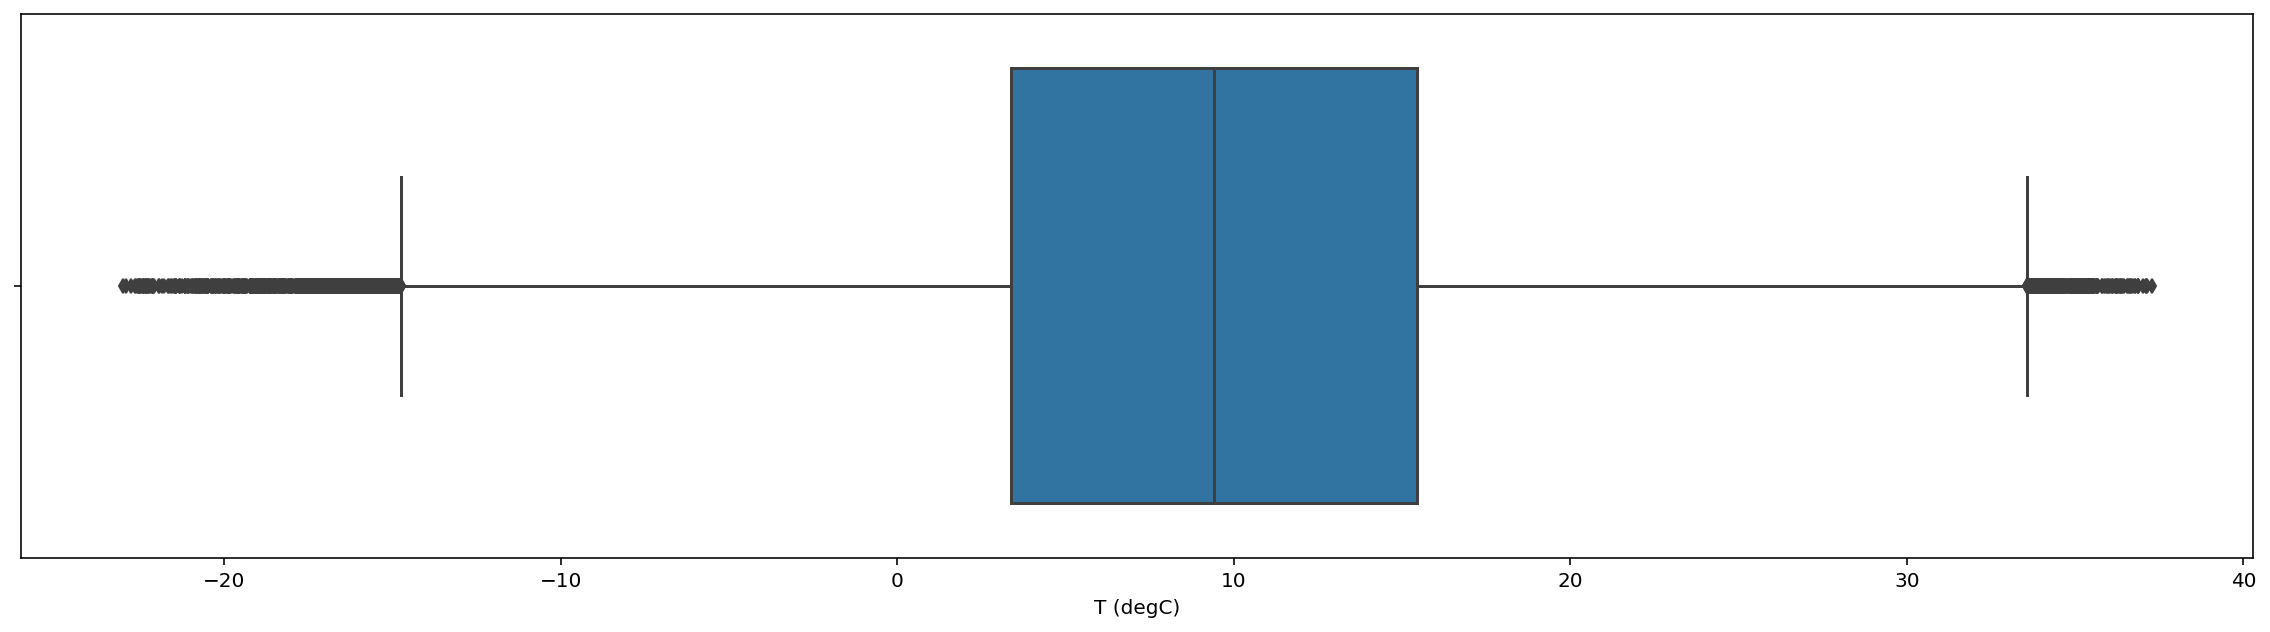

In [36]:
plt.figure(figsize=(20, 5))

sns.boxplot(clean_data[TAG_NAME])

plt.show()

Now, consider that we use the 1st and 99th quantiles for the specified sensors.

In [37]:
QUANTILE_PARAM = 0.99

upper_quantile = clean_data[TAG_NAME].quantile(QUANTILE_PARAM)
lower_quantile = clean_data[TAG_NAME].quantile(1-QUANTILE_PARAM)

Let's backtest our **statistical profiling** strategy:

In [38]:
backtesting_df = clean_data.copy()

for col in SENSORS_THRESHOLDS.keys():
    upper_alert = (backtesting_df[col] > upper_quantile)
    lower_alert = (backtesting_df[col] < lower_quantile)
    
    backtesting_df[f'is_alert_{col}'] = (upper_alert | lower_alert).astype(int)

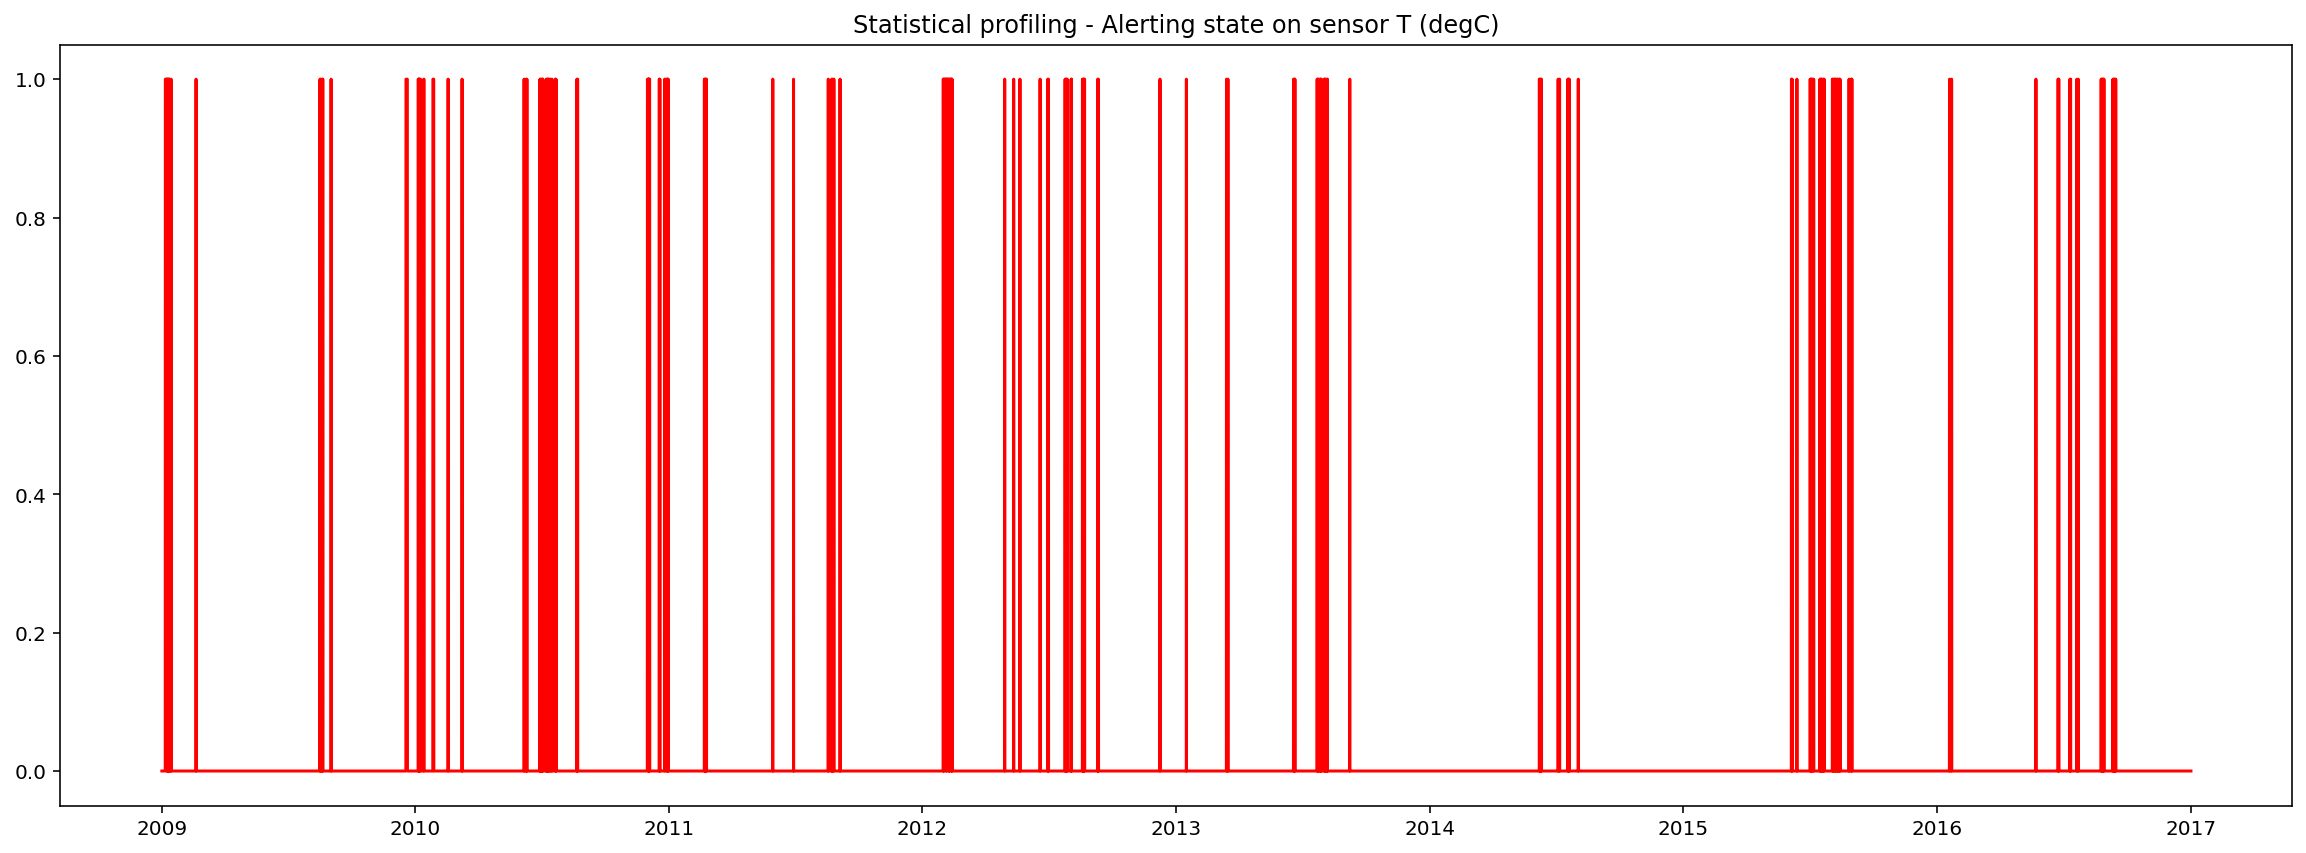

In [39]:
plt.figure(figsize=(20, 7))

plt.plot(backtesting_df[f'is_alert_{TAG_NAME}'], color='red')
plt.title(f'Statistical profiling - Alerting state on sensor {TAG_NAME}')

plt.show()

## Forecasting

### A word of caution

One needs to be careful when predicting the future:

- _"Stocks have reached what looks like a permanently high plateau."_ - Irving Fischer, Professor of Economics, Yale University, 1929
    - True or False?

- _"Computers in the future weigh no more than 1.5 tons."_ - Popular Mechanics, forecasting the relentless march of science, 1949
    - True or False?

### Introduction to Prophet

- Open-sourced by Facebook's core data science team a few years ago, Prophet is based on time series decomposition but has the ability to model different seasonalities as well as the effect of holidays and special events.

- On [Prophet Github page](https://github.com/facebook/prophet), we find the following description:

_"Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well."_

- In this section, we'll try to assess how Prophet performs to predict the future value of the temperature (the T (degC) sensor).

The input to Prophet is always a DataFrame with 2 columns: `ds` and `y`:
- The `ds` (datestamp) column should be of a format expected by pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. 
- The `y` column must be numeric, and represents the measurement we wish to forecast.

In [40]:
TAG_NAME = 'T (degC)'

prophet_df = clean_data.resample('1d').ffill()
prophet_df = prophet_df[[TAG_NAME]].reset_index()
prophet_df = prophet_df.rename(columns={'Date Time':'ds', TAG_NAME:'y'})

prophet_df.head()

ds     y
0 2009-01-01   NaN
1 2009-01-02 -4.54
2 2009-01-03 -4.71
3 2009-01-04 -1.90
4 2009-01-05 -1.47

Prophet follows the sklearn model API. We create an instance of the `Prophet `class and then call its `fit` and `predict` methods.

In [41]:
model = Prophet()
model.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Now that we have a model, we can make predictions on a DataFrame with a column `ds` containing the dates for which a prediction is to be made. 

You can get a suitable DataFrame that extends into the future a specified number of days using the helper method `Prophet.make_future_dataframe` (by default, it will also include the dates from the history).

In [42]:
future = model.make_future_dataframe(periods=365)
future.tail()

ds
3283 2017-12-28
3284 2017-12-29
3285 2017-12-30
3286 2017-12-31
3287 2018-01-01

Now, we can apply the `predict` method to this DataFrame: it will assign each row a predicted value which it names `yhat`. If you pass in historical dates, it will provide an in-sample fit.

In [43]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3283 2017-12-28  2.407532   -2.754282    7.473528
3284 2017-12-29  2.483782   -2.476036    7.554801
3285 2017-12-30  2.297809   -2.921147    7.272485
3286 2017-12-31  2.184010   -3.054064    7.497246
3287 2018-01-01  2.205842   -2.692102    7.197840

We can lot the forecast by calling the `Prophet.plot` method and passing in our forecast DataFrame.

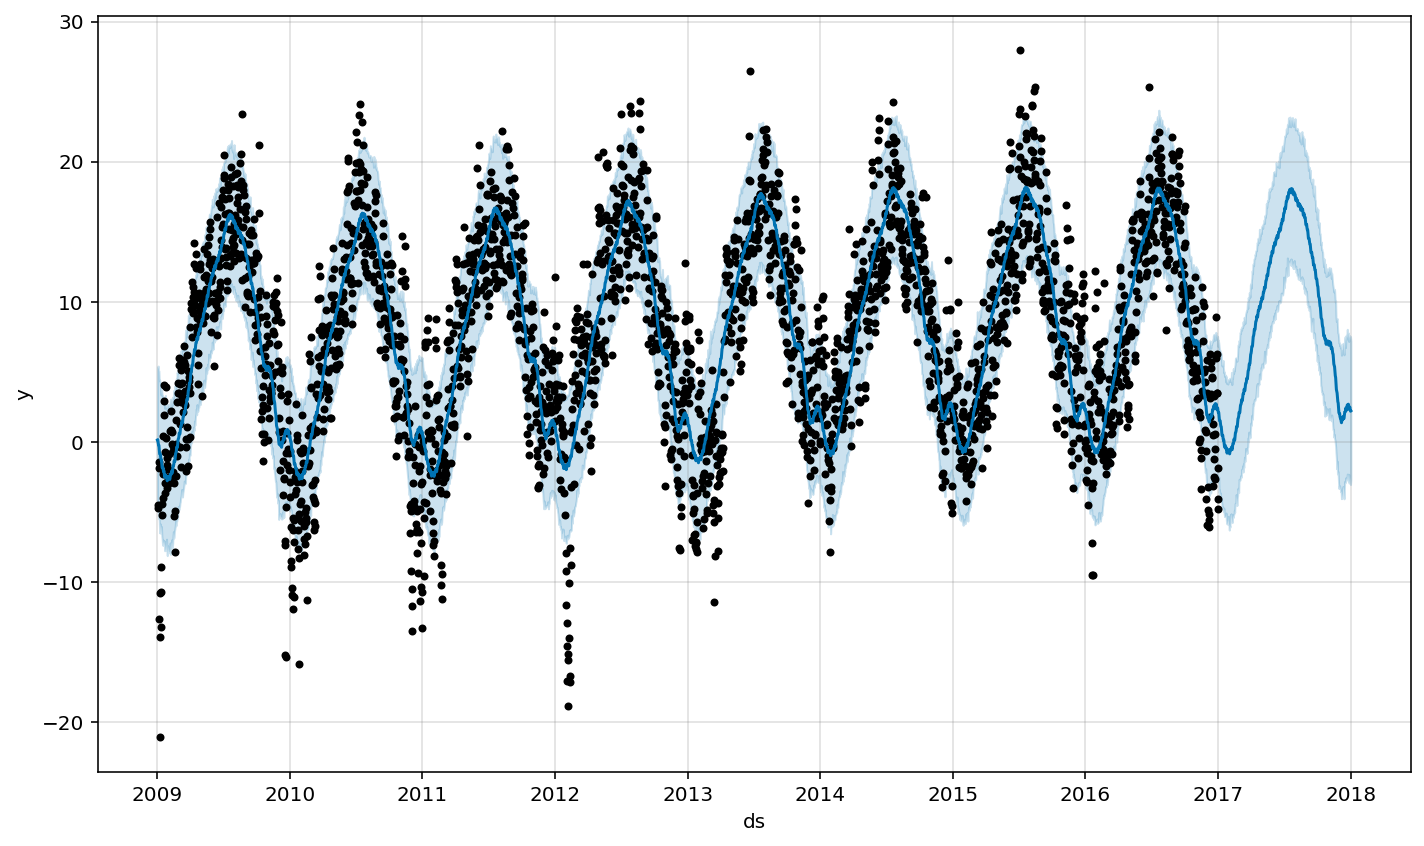

In [44]:
fig1 = model.plot(forecast)

If you want to see the forecast components, you can use the `Prophet.plot_components` method. 

By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

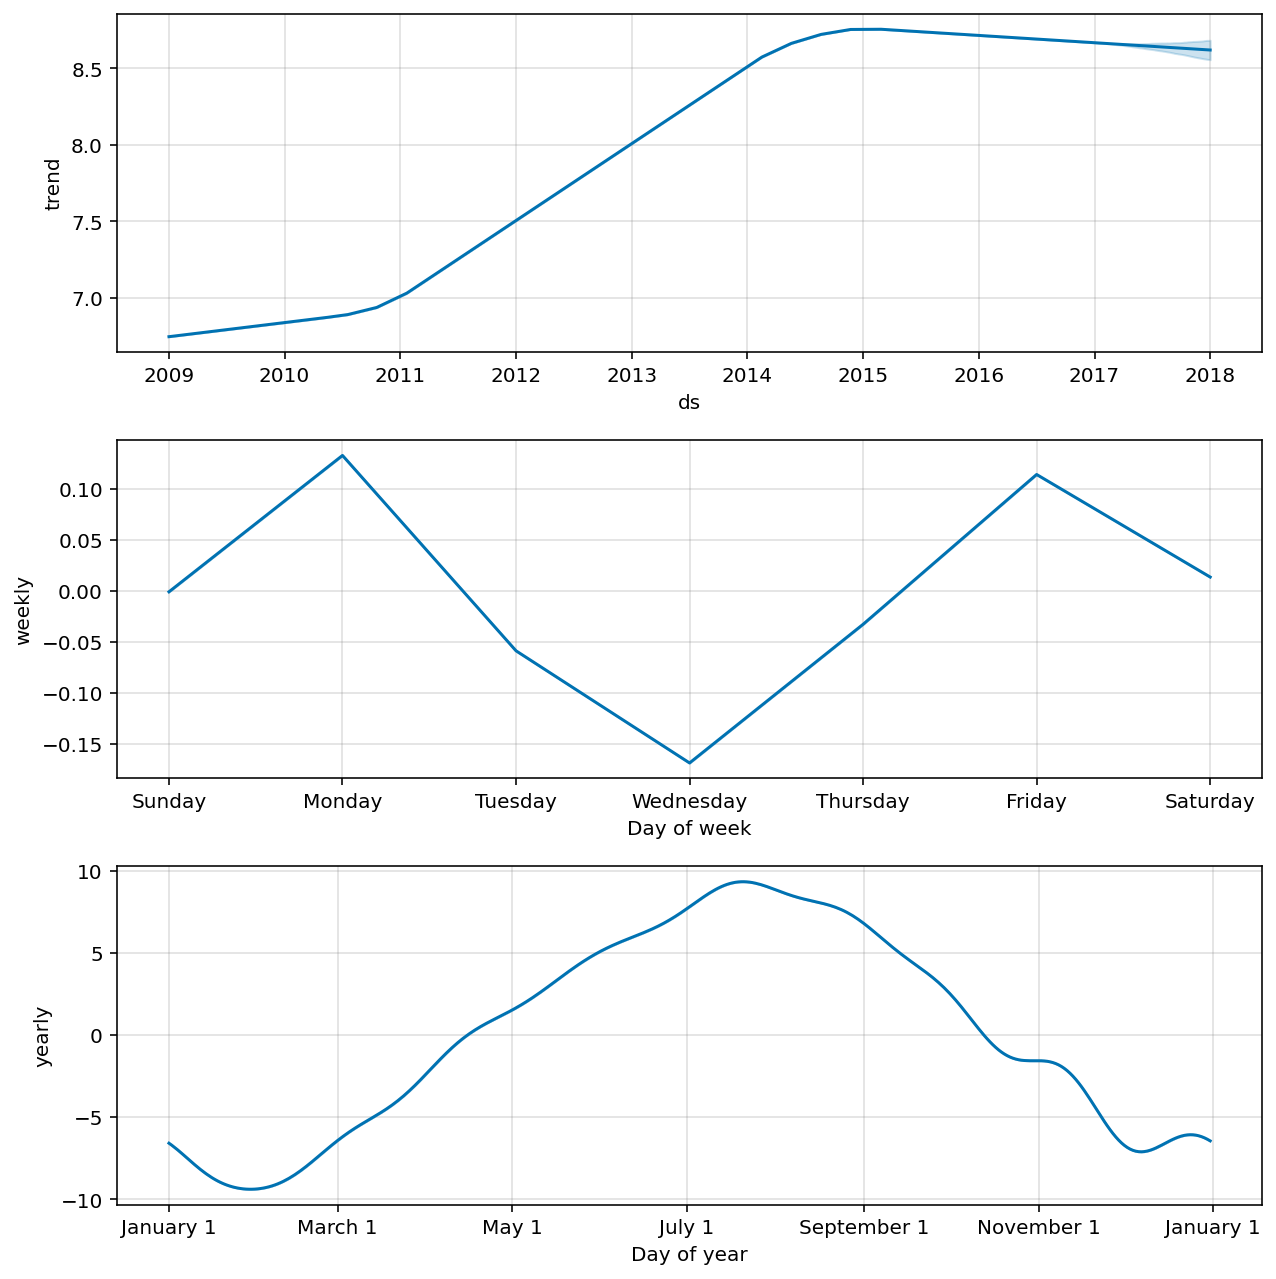

In [45]:
fig2 = model.plot_components(forecast)

## Thank you!
### Any feedback? Return on time invested?